## 17/12/2020 Update
# Linking and Comparing Local Connect Stats with Low-rank Recurrent Network
* From Local Connect Stats cite[Sharpee]
* From Low-rank structure to EI 

In [1]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import numpy as np
import matplotlib.pylab as plt
import matplotlib
%matplotlib qt
from numpy import linalg as la
from scipy.optimize import fsolve
from scipy import linalg as scpla
# import seaborn as sb
from mpl_toolkits.axes_grid1 import make_axes_locatable
from cmath import *
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import fsolve,leastsq 
from math import tanh,cosh
import math
# from sympy import *
from scipy.linalg import schur, eigvals
extras_require = {'PLOT':['matplotlib>=1.1.1,<3.0']},

## Check the results in Sharpee's paper
* local stats, EE,EI,IE,II occupy their own properties, independently
* no pair correlation


In [178]:
Nt=np.array([2000,1000])
NE,NI=Nt[0],Nt[1]
at = Nt/N
N=np.sum(Nt)
aee,aei,aie,aii=4.5,-6.0,5.0,-2.5
JEEsub,JEIsub,JIEsub,JIIsub=aee*np.ones((NE,NE))/NE,aei*np.ones((NE,NI))/NI,aie*np.ones((NI,NE))/NE,aii*np.ones((NI,NI))/NI
J = np.zeros((NE+NI,NE+NI))

# determine gcd
Gmat=np.zeros((2,2))
Gmatorg=np.array([[0.8,1.2],[0.9,0.2]])
# Gmat/=np.sqrt(N)
for i in range(2):
    for j in range(2):
        Gmat[i,j]=Gmatorg[i,j]/np.sqrt(N)
# EE
gij=Gmat[0,0]*np.random.randn(NE,NE)
J[:NE,:NE]=gij.copy()
# EI
gij=Gmat[0,1]*np.random.randn(NE,NI)
J[:NE,NE:]=gij.copy()
# IE
gij=Gmat[1,0]*np.random.randn(NI,NE)
J[NE:,:NE]=gij.copy()
# II
gij=Gmat[1,1]*np.random.randn(NI,NI)
J[NE:,NE:]=gij.copy()

P = np.zeros((N,N))
P[:NE,:NE],P[:NE,NE:],P[NE:,:NE],P[NE:,NE:]=JEEsub.copy(),JEIsub.copy(),JIEsub.copy(),JIIsub.copy()
X = P.copy()+J.copy()

In [113]:
gavg=np.sqrt(np.sum(np.sum(Gmat**2)))/2.0
print('averaging g noise:',gavg*np.sqrt(N))

averaging g noise: 0.8558621384311844


In [105]:
aee,aei,aie,aii=4.5,-6.0,5.0,-2.5
Asmall=np.array([[aee,aei],[aie,aii]])
eigva,_=la.eig(Asmall)
_,sigva,_=la.svd(Asmall)
print('eigenvalue:',eigva,'singular value:',sigva,'eigG',np.sqrt(eigG[0]))

eigenvalue: [1.+4.21307489j 1.-4.21307489j] singular value: [9.12570385 2.05463604] eigG 0.8546614831429354


In [179]:
# all about calculate eigenvalues
eigvrand,eigvecrand=la.eig(J)
eigstruct,eigvecstruct=la.eig(P)
# summation
X = P.copy()+J.copy()
eigvx,eigvecx=la.eig(X)
# theoretical
M = np.zeros((2,2))
for i in range(2):
    for j in range(2):
        M[i,j]=(Gmat[i,j]*np.sqrt(N))**2*(Nt[j]/N)
eigG,eigvecG=la.eig(M)
# low rank small
Asmall=np.array([[aee,aei],[aie,aii]])
eigva,_=la.eig(Asmall)


In [180]:
ticks = np.linspace(-2.0,2.0,3)
lims= [-2.1,2.1]

fig,ax=plt.subplots(figsize=(6,6))
ax.plot(np.sqrt(eigG[0])*np.ones(100),np.linspace(-1.0,1.0,100))
ax.scatter(np.real(eigvrand),np.imag(eigvrand),s=5.0,c='blue',alpha=0.5)
ax.scatter(np.real(eigstruct[:4]),np.zeros(4),s=15.0,c='red',alpha=0.5)
# ax.set_xlim(lims)
# ax.set_ylim(lims)
# ax.set_xticks(ticks)
# ax.set_yticks(ticks)
ax.set_aspect('equal')
ax.grid()

## relate this to low rank (here rank-2)

In [109]:
lvecX,svX,rvecXh=la.svd(X)
rvecX=rvecXh.T
m=lvecX[:,:2].copy()
n=rvecX[:,:2].copy()
n[:,0]*=svX[0]
n[:,1]*=svX[1]

# n[:,1]=rvecX[:,2]*svX[2]
# m[:,1]=lvecX[:,2]

In [111]:
morg,norg=m,n
fig,ax=plt.subplots(4,4,figsize=(9,9))
for i in range(2):
    for j in range(2):
        ax[i][j].scatter(morg[:NE,i],morg[:NE,j],s=5.0,c='red',alpha=0.05)
        ax[i][j].scatter(morg[NE:,i],morg[NE:,j],s=5.0,c='blue',alpha=0.05)
for i in range(2):
    for j in range(2):
        ax[2+i][2+j].scatter(norg[:NE,i],norg[:NE,j],s=5.0,c='red',alpha=0.05)
        ax[2+i][2+j].scatter(norg[NE:,i],norg[NE:,j],s=5.0,c='blue',alpha=0.05)
        
for i in range(2):
    for j in range(2):
        ax[i][2+j].scatter(morg[:NE,i],norg[:NE,j],s=5.0,c='red',alpha=0.05)
        ax[i][2+j].scatter(morg[NE:,i],norg[NE:,j],s=5.0,c='blue',alpha=0.05)
for i in range(2):
    for j in range(2):
        ax[2+i][j].scatter(norg[:NE,i],morg[:NE,j],s=5.0,c='red',alpha=0.05)
        ax[2+i][j].scatter(norg[NE:,i],morg[NE:,j],s=5.0,c='blue',alpha=0.05)
for i in range(4):
    for j in range(4):
        # ax[i][j].set_xlim(lims)
        # ax[i][j].set_ylim(lims)
        # ax[i][j].set_xticks(ticks)
        # ax[i][j].set_yticks(ticks)
        ax[i][j].set_aspect('equal')
        ax[i][j].grid()

In [117]:
# test Dale's law
Nt=np.array([300,100])
NE,NI=Nt[0],Nt[1]
N=np.sum(Nt)
aee,aei,aie,aii=4.5,-6.0,5.0,-2.5
JEEsub,JEIsub,JIEsub,JIIsub=aee*np.ones((NE,NE))/NE,aei*np.ones((NE,NI))/np.sqrt(NE*NI),aie*np.ones((NI,NE))/np.sqrt(NE*NI),aii*np.ones((NI,NI))/NI
P = np.zeros((N,N))
P[:NE,:NE],P[:NE,NE:],P[NE:,:NE],P[NE:,NE:]=JEEsub.copy(),JEIsub.copy(),JIEsub.copy(),JIIsub.copy()
eigvP,_=la.eig(P)
_,sigvp,_=la.svd(P)
Asmall=np.array([[aee,aei],[aie,aii]])
eigva,_=la.eig(Asmall)
_,sigva,_=la.svd(Asmall)

print('eigenvalue:',eigvP[:2],eigva[:2])
print('singular value:',sigvp[:2],sigva[:2])

eigenvalue: [1.+4.21307489j 1.-4.21307489j] [1.+4.21307489j 1.-4.21307489j]
singular value: [9.12570385 2.05463604] [9.12570385 2.05463604]


In [184]:
# test Dale's law
Nt=np.array([100,1000])
NE,NI=Nt[0],Nt[1]
N=np.sum(Nt)
at=Nt/N
# determine gcd
Gmat=np.zeros((2,2))
Gmatorg=np.array([[0.8,1.2],[0.9,0.2]])
# Gmat/=np.sqrt(N)
for i in range(2):
    for j in range(2):
        Gmat[i,j]=Gmatorg[i,j]/np.sqrt(N)
# EE
J=np.zeros((N,N))

gij=np.zeros((NE,NE))
gij=Gmat[0,0]*np.random.randn(NE,NE)
J[:NE,:NE]=gij.copy()
# EI
gij=np.zeros((NE,NI))
gij=Gmat[0,1]*np.random.randn(NE,NI)
J[:NE,NE:]=gij.copy()
# IE
gij=np.zeros((NI,NE))
gij=Gmat[1,0]*np.random.randn(NI,NE)
J[NE:,:NE]=gij.copy()
# II
gij=np.zeros((NI,NI))
gij=Gmat[1,1]*np.random.randn(NI,NI)
J[NE:,NE:]=gij.copy()

gavg=0
for i in range(2):
    for j in range(2):
        gavg+=np.sqrt(Gmatorg[i,j]**2*at[i]*at[j])
M = np.zeros((2,2))
for i in range(2):
    for j in range(2):
        M[i,j]=(Gmatorg[i,j]**2)*at[j]

eigvj,_=la.eig(J)
eigvM,_=la.eig(M)
ticks = np.linspace(-2.0,2.0,3)
lims= [-2.1,2.1]

fig,ax=plt.subplots(figsize=(6,6))
ax.plot(np.sqrt(eigvM[0])*np.ones(100),np.linspace(-1.0,1.0,100))
ax.scatter(np.real(eigvj),np.imag(eigvj),s=5.0,c='blue',alpha=0.5)
print('average eigv:',gavg)


average eigv: 0.858253007850327


In [227]:
# testing distribution of J_{ij}
NE,NI=750,250
sigm,sign=0.5,1.2
mE,nE=sigm*np.random.randn(NE,1)/np.sqrt(NE),sign*np.random.randn(NE,1)/np.sqrt(NE)
JEE = mE@nE.T 
eigv,eigvec=la.eig(JEE)
fig,ax=plt.subplots(figsize=(6,6))
ax.scatter(np.real(eigvj),np.imag(eigvj),s=5.0,c='blue',alpha=0.5)

JEEoff=JEE.copy()
JEEdiag=np.zeros(NE)
for i in range(NE):
    JEEoff[i,i:NE-1]=JEEoff[i,i+1:]
    JEEdiag[i]=JEE[i,i]
fig,ax=plt.subplots(2,1,figsize=(6,6))
Joff=JEEoff[:,:NE-1]
Joff=np.reshape(Joff,(NE**2-NE,1))
n, bins, patches = ax[0].hist(Joff, 100, density=True, alpha=0.5)
n, bins, patches = ax[1].hist(JEEdiag, 100, density=True, alpha=0.5)
print(sigm*sign)



0.6


## What's the distribution of $J_{i,j}$ in $\tilde{\mathbf{X}}=\mathbf{X}+\mathbf{p}$

In [229]:
# testing distribution of J_{ij} in \tilde{X}
NE,NI=2000,250
sigm,sign,grandom=0.6,1.0,0.5
rho=0.0
zetax,zetay=np.random.randn(NE,1),np.random.randn(NE,1)
m = sigm*zetax/np.sqrt(NE)
n =sign*(rho*zetax+np.sqrt(1-rho**2)*zetay)/np.sqrt(NE)
P = m@n.T 
X = (grandom)*np.random.randn(NE,NE)/np.sqrt(NE)

Xtilde=X+P

eigv,eigvec=la.eig(Xtilde)
fig,ax=plt.subplots(figsize=(6,6))
ax.scatter(np.real(eigv),np.imag(eigv),s=5.0,c='blue',alpha=0.5)

JEEoff=Xtilde.copy()
JEEdiag=np.zeros(NE)
for i in range(NE):
    JEEoff[i,i:NE-1]=JEEoff[i,i+1:]
    JEEdiag[i]=Xtilde[i,i]
fig,ax=plt.subplots(2,1,figsize=(6,6))
Joff=JEEoff[:,:NE-1]
Joff=np.reshape(Joff,(NE**2-NE,1))
n, bins, patches = ax[0].hist(Joff, 100, density=True, alpha=0.5)
n, bins, patches = ax[1].hist(JEEdiag, 100, density=True, alpha=0.5)

## Generate Random Block Matrix, embedding low rank structur $\tilde{\mathbf{X}}_{\mathrm{type}}=\mathbf{X}_{\mathrm{type}}+\mathbf{P}_{\mathrm{type}}$

In [238]:
phiacttt=np.zeros((N,1))
phiacttt[:NE,0],phiacttt[NE:,0]=(rhoE*zetaxE+np.sqrt(1-rhoE**2)*zetayE)/np.sqrt(N),(rhoI*zetaxI+np.sqrt(1-rhoI**2)*zetayI)/np.sqrt(N)
eitatt=Xtilde@phiacttt
eitarand=X@phiacttt
coveitatt=eitatt@eitatt.T 
coveitarand=eitarand@eitarand.T 
deltaEt,deltaEr=coveitatt[:NE,:NE],coveitarand[:NE,:NE]
deltaIt,deltaIr=coveitatt[NE:,NE:],coveitarand[NE:,NE:]
print('std, Et:',np.std(deltaEt),'; random:',np.std(deltaEr))
print('std, It:',np.std(deltaIt),'; random:',np.std(deltaIr))

In [411]:
eigvx,_=la.eig(X)
eigvxt,_=la.eig(Xtilde)
fig,ax=plt.subplots(2,2,figsize=(9,9))
ax[0][0].scatter(np.real(eigvx),np.imag(eigvx),s=2.0,c='red',alpha=0.5)
ax[0][0].set_aspect('equal')
print(np.sqrt(xee**2*NE/N))
ax[1][0].scatter(np.real(eigvxt),np.imag(eigvxt),s=2.0,c='red',alpha=0.5)
ax[1][0].set_aspect('equal')
# HISTOGRAM
n, bins, patches = ax[0][1].hist(np.real(eigvx), 20, density=True, alpha=0.5)
ax[0][1].set_xlim([-4.0,4.0])
n, bins, patches = ax[1][1].hist(np.real(eigvxt), 20, density=True, alpha=0.5)
ax[0][1].set_xlim([-4.0,4.0])
# SUBTYPE
XEI,XTEI=X[:NE,NE:],Xtilde[:NE,NE:]
eigvEI,eigvec=la.eig(XEI)
eigvTEI,eigvec=la.eig(XTEI)
fig,ax=plt.subplots(1,2,figsize=(6,6))
ax[0].scatter(np.real(eigvEI),np.imag(eigvEI),s=5.0,c='blue',alpha=0.5)
ax[1].scatter(np.real(eigvTEI),np.imag(eigvTEI),s=5.0,c='blue',alpha=0.5)

XEE,XTEE=X[:NE,:NE],Xtilde[:NE,:NE]
eigvEE,eigvec=la.eig(XEE)
eigvTEE,eigvec=la.eig(XTEE)
fig,ax=plt.subplots(1,2,figsize=(6,6))
ax[0].scatter(np.real(eigvEE),np.imag(eigvEE),s=5.0,c='red',alpha=0.5)
ax[1].scatter(np.real(eigvTEE),np.imag(eigvTEE),s=5.0,c='red',alpha=0.5)

XIE,XTIE=X[NE:,:NE],Xtilde[NE:,:NE]
eigvIE,eigvec=la.eig(XIE)
eigvTIE,eigvec=la.eig(XTIE)
fig,ax=plt.subplots(1,2,figsize=(6,6))
ax[0].scatter(np.real(eigvIE),np.imag(eigvIE),s=5.0,c='blue',alpha=0.5)
ax[1].scatter(np.real(eigvTIE),np.imag(eigvTIE),s=5.0,c='blue',alpha=0.5)

XII,XTII=X[NE:,NE:],Xtilde[NE:,NE:]
eigvII,eigvec=la.eig(XII)
eigvTII,eigvec=la.eig(XTII)
fig,ax=plt.subplots(1,2,figsize=(6,6))
ax[0].scatter(np.real(eigvII),np.imag(eigvII),s=5.0,c='red',alpha=0.5)
ax[1].scatter(np.real(eigvTII),np.imag(eigvTII),s=5.0,c='red',alpha=0.5)


1.7677669529663689


# 24/12 Generate Figures and Some Questions

In [3]:
def calculate_angle(vector_1,vector_2):
    unit_vector_1 = vector_1 /np.linalg.norm(vector_1)
    unit_vector_2 = vector_2 /np.linalg.norm(vector_2)
    dot_product = np.dot(unit_vector_1, unit_vector_2)
    angle = np.arccos(dot_product)
    return angle

## Generate Matrix

In [428]:
# Block Gaussian Random Network
xee,xei,xie,xii=2.0,0.0,0.0,1.5#1.2,1.2,1.8
JE,JI=2.5,2.0

Niter =5
Np = 20
xees=np.linspace(0.4,2.4,Np)
gaverages=np.zeros((Np,Niter))
gradiuss=np.zeros((Np,Niter))
svams = np.zeros((Np,Niter))
svxts = np.zeros((Np,Niter))
for i in range(Niter):
    for idx, xee in enumerate(xees):
        # generate random 
        Grand=np.array([xee,0,0,xii])
        X,Gamp,eigvgm,eigvecgm,gaverages[idx,i],ugm,svgm,vgm=generate_localstatsmat(Nparams,Grand)
        gradiuss[idx,i]=np.sqrt(eigvgm[0])
        # generate mean Am
        Am,Jsv,us,svams[idx,i],va=generate_meanmat(Nparams,JE,JI)
        # CALCULATE XTOTAL
        Xtotal=X.copy()+Am.copy()
        # Combine, total svd decomposition
        uxt,svxt,vhxt=la.svd(Xtotal)
        vxt=vhxt.T   
        svxts[idx,i]=svxt[0]





ValueError: setting an array element with a sequence.

In [1560]:
ticks = np.linspace(4.7,5.5,3)
lims= [4.69,5.51]
# calculate the theoretical singular values of Xtotal
svxts_theo = np.mean(svams[0]+gaverages**2/svams[0],axis=1)
svxts_theo_eff = np.mean(svams[0]+gradiuss**2/svams[0],axis=1)
svxtsm=np.mean(svxts,axis=1)
fig,ax=plt.subplots(figsize=(6,6))
ax.plot(svxtsm,svxtsm,'k--',linewidth=1.0,alpha=0.5)
ax.plot(svxtsm,svxts_theo,'r.',linewidth=1.5)
ax.plot(svxtsm,svxts_theo_eff,'b.',linewidth=1.5)
ax.set_xlim(lims)
ax.set_ylim(lims)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_aspect('equal')




In [2263]:
# Block Gaussian Random Network
xee,xei,xie,xii=0.8,0.5,0.5,0.6#1.2,1.2,1.8
JE,JI=2.0,4.0

# generate random 
Grand=np.array([xee,xei,xie,xii])
X,Gamp,eigvgm,eigvecgm,gaverage,ugm,svgm,vgm=generate_localstatsmat(Nparams,Grand)
gradius=np.sqrt(eigvgm[0])
# generate mean Am
Am,Jsv,ua,svam,va=generate_meanmat(Nparams,JE,JI)
# CALCULATE XTOTAL
Xtotal=X.copy()+Am.copy()
# Combine, total svd decomposition
uxt,svxt,vhxt=la.svd(Xtotal)
vxt=vhxt.T   


In [2264]:
## difference between singular value and eigenvalue
# First Set of Figures
# figure, validate results in sharpee's paper
# ticks and labels
# eigvx,eigvecx=la.eig(Xtotal)
theta = np.linspace(0, 2 * np.pi, 200)
xc = gradius*np.cos(theta)
yc = gradius*np.sin(theta)

xa = gaverage*np.cos(theta)
ya = gaverage*np.sin(theta)

ticks = np.linspace(-1.50,1.50,3)
lims= [-1.51,1.51]
nbins=100
fig,ax=plt.subplots(figsize=(6,6))
# eigenvalue
ax.scatter(np.real(eigvx),np.imag(eigvx),s=2.0,c='blue',alpha=0.5)
ax.plot(xc, yc, color="darkred", linewidth=2)
ax.plot(xa, ya, color="grey", linewidth=2,linestyle='--')
ax.set_xlim(lims)
ax.set_ylim(lims)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_aspect('equal')
ax.set_title(r'$J_E,\ J_I=$'+str(JE)+','+str(JI)+'\n $\lambda_1=$'+str(format(gradius,'.1f'))+r', $g_{avg}=$'+str(format(gaverage,'.1f')),fontsize=14)
print(np.sqrt(0.5*JE**2+0.5*JI**2),np.min(np.real(eigvx)),gradius)
print(gaverage**2/svam+svam,svxt[0],gradius**2/svam+svam)

ValueError: operands could not be broadcast together with shapes (2,) (200,) 

Parameters
a(M, M) array_like
Matrix to decompose
output{‘real’, ‘complex’}, optional
Construct the real or complex Schur decomposition (for real matrices).
lworkint, optional
Work array size. If None or -1, it is automatically computed.
overwrite_abool, optional
Whether to overwrite data in a (may improve performance).
sort{None, callable, ‘lhp’, ‘rhp’, ‘iuc’, ‘ouc’}, optional
Specifies whether the upper eigenvalues should be sorted. A callable may be passed that, given a eigenvalue, returns a boolean denoting whether the eigenvalue should be sorted to the top-left (True). Alternatively, string parameters may be used:
'lhp'   Left-hand plane (x.real < 0.0)
'rhp'   Right-hand plane (x.real > 0.0)
'iuc'   Inside the unit circle (x*x.conjugate() <= 1.0)
'ouc'   Outside the unit circle (x*x.conjugate() > 1.0)

## test how the iid vectors constitute overall
## put them together and try to figure out the the properties

In [39]:
Nt=np.array([1000,1000])
NE,NI=Nt[0],Nt[1]
Nparams=np.array([NE,NI])

def generate_localstatsmat(Nparams,Grand):
    xee,xei,xie,xii=Grand[0],Grand[1],Grand[2],Grand[3]
    NE,NI=Nparams[0],Nparams[1]
    N=NE+NI
    at = Nt/N   
    X=np.zeros((N,N))
    X[:NE,:NE],X[NE:,NE:]=np.random.randn(NE,NE),np.random.randn(NE,NE)
    X[:NE,NE:],X[NE:,:NE]=np.random.randn(NE,NE),np.random.randn(NE,NE)

    X[:NE,:NE],X[NE:,NE:]=xee*X[:NE,:NE]/np.sqrt(NE),xii*X[NE:,NE:]/np.sqrt(NI)
    X[:NE,NE:],X[NE:,:NE]=xei*X[:NE,NE:]/np.sqrt(NE),xie*X[NE:,:NE]/np.sqrt(NI)
    # print('std indeed:',xee/np.sqrt(N),xei/np.sqrt(N),xie/np.sqrt(N),xii/np.sqrt(N))
    eigvx,eigvecx=la.eig(X)
    # theoretical M (grandom) matrix 
    gmat = np.array([[xee**2,xei**2],[xie**2,xii**2]])
    # first do not multiply at
    gaverage=0
    for i in range(2):
        for j in range(2):
            gaverage+=gmat[i,j]/2 # ntype=2
    gaverage=np.sqrt(gaverage)
    # for i in range(2):
    #     gmat[:,i]*=at[i]
    eigvgm,eigvecgm=schur(gmat)
    # eigvgm=eigvals(eigvgm)
    ugm,svgm,vhgm=la.svd(gmat)
    vgm=vhgm.T
    ngm=vhgm.copy()
    ngm=ngm.T 
    ngm[:,0],ngm[:,1]=svgm[0]*ngm[:,0],svgm[1]*ngm[:,1]

    # properties
    Gamp=np.zeros((2,2))
    Gamp[0,0],Gamp[0,1],Gamp[1,0],Gamp[1,1]=xee,xei,xie,xii

    return (X,Gamp,eigvgm,eigvecgm,gaverage,ugm,svgm,vgm)

def generate_meanmat(Nparams,JEE,JIE,JEI,JII):
    # mean value 
    # first use rank-1 structure
    NE,NI=Nparams[0],Nparams[1]
    N=NE+NI
    at = Nt/N   
    Am=np.zeros((N,N))
    Am[:NE,:NE],Am[:NE,NE:]=JEE/NE,-JEI/NI
    Am[NE:,:NE],Am[NE:,NE:]=JIE/NE,-JII/NI
    ua,svam,vha=la.svd(Am)
    va=vha.T
    svam=svam[0]
    # ua,va=np.zeros((N,N)),np.zeros((N,N))
    # ua[:,0]=1.0/np.sqrt(N)
    # va[:NE,0]=JE/np.sqrt(NE)
    # va[NE:,0]=-JI/np.sqrt(NI)
    # va[:,0]/=-np.linalg.norm(va[:,0])
    # svam=np.sqrt(2*(JE**2+JI**2))
    # vha=va.T

    Jsv=np.zeros((2,2))
    Jsv[0,0],Jsv[0,1],Jsv[1,0],Jsv[1,1]=JE,JI,JE,JI

    return (Am,Jsv,ua,svam,va)





In [280]:
# Block Gaussian Random Network
# xee,xei,xie,xii=0.3,0.00,0.00,0.4#1.2,1.2,1.8
# JE,JI=5.50*xee,6.0*xii
xee,xei,xie,xii=0.6,0.00,0.00,0.9#1.2,1.2,1.8
JE,JI=2.0*xee,4.0*xii
# properties
Gamp=np.zeros((2,2))
Gamp[0,0],Gamp[0,1],Gamp[1,0],Gamp[1,1]=xee,xei,xie,xii
Gamp=Gamp**2
eigvG,eigvecG=la.eig(Gamp)
Gampnew=eigvecG.T@Gamp@eigvecG
J=np.zeros((2,2))
J[:,0],J[:,1]=JE,-JI 
Jnew=eigvecG.T@J@eigvecG
# print(Jnew)
xee,xei,xie,xii=np.sqrt(Gampnew[0,0]),np.sqrt(Gampnew[0,1]),np.sqrt(Gampnew[1,0]),np.sqrt(Gampnew[1,1])
# print(xee,xei,xie,xii,Gampnew)
JEE,JIE,JEI,JII=Jnew[0,0],Jnew[1,0],-Jnew[0,1],-Jnew[1,1]


# generate random 
Grand=np.array([xee,0,0,xii])
X,Gamp,eigvgmT,eigvecgm,gaverage,ugm,svgm,vgm=generate_localstatsmat(Nparams,Grand)
# print(Gamp[0,0],Gamp[1,1])
eigvgm=eigvals(eigvgmT)
# print(eigvgm)
idx = eigvgm.argsort()[::-1]   
eigvgm = eigvgm[idx]
gradius=np.sqrt(eigvgm[0])
# generate mean Am
Am,Jsv,ua,svam,va=generate_meanmat(Nparams,JEE,JIE,JEI,JII)
print(JEE,JIE)
print(JEE,JEI)
print(Grand)

1.2 1.2
1.2 3.6
[0.6 0.  0.  0.9]


In [281]:
Xtotal=X.copy()+Am.copy()
# singular decomposition blockage
XEEtotal,XEItotal,XIEtotal,XIItotal=Xtotal[:NE,:NE],Xtotal[:NE,NE:],Xtotal[NE:,:NE],Xtotal[NE:,NE:]
uxtEE,svxtEE,vhxtEE=la.svd(XEEtotal)
vxtEE=vhxtEE.T
uxtEI,svxtEI,vhxtEI=la.svd(XEItotal)
vxtEI=vhxtEI.T
uxtIE,svxtIE,vhxtIE=la.svd(XIEtotal)
vxtIE=vhxtIE.T
uxtII,svxtII,vhxtII=la.svd(XIItotal)
vxtII=vhxtII.T
# Combine, total svd decomposition
uxt,svxt,vhxt=la.svd(Xtotal)
vxt=vhxt.T
# decomposition of the noise
ux,svx,vhx=la.svd(X)
vx=vhx.T
# print singular values
print('singular value, outliers')
print(svxt[:3])
print(svx[:3])

singular value, outliers
[5.49608188 1.7833232  1.7763632 ]
[1.78353212 1.7768907  1.77539379]


## plot eigenvalues here

In [282]:
eigvx,_=la.eig(Xtotal)
theta = np.linspace(0, 2 * np.pi, 200)
xc = gradius*np.cos(theta)
yc = gradius*np.sin(theta)

xa = gaverage*np.cos(theta)
ya = gaverage*np.sin(theta)

tickeig=np.fabs(JE-JI)*1.5
ticks = np.linspace(-tickeig,tickeig,3)
lims= [-tickeig-0.01,tickeig+0.01]
nbins=100
fig,ax=plt.subplots(figsize=(6,6))
# eigenvalue
ax.scatter(np.real(eigvx),np.imag(eigvx),s=2.0,c='blue',alpha=0.5)
ax.plot(xc, yc, color="darkred", linewidth=2)
ax.plot(xa, ya, color="grey", linewidth=2,linestyle='--')
ax.set_xlim(lims)
ax.set_ylim(lims)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_aspect('equal')
ax.set_title(r'$J_{EE},J_{IE}\ J_{EI},J_{II}=$'+str(format(JEE,'.2f'))+','+str(format(JIE,'.2f'))+','+str(format(JEI,'.2f'))+','+str(format(JII,'.2f'))+'\n $\lambda_1=$'+str(format(np.real(gradius),'.2f'))+r', $g_{avg}=$'+str(format(gaverage,'.2f')),fontsize=14)
# print(np.sqrt(0.5*JE**2+0.5*JI**2),np.min(np.real(eigvx)),gradius)
# print(gaverage**2/svam+svam,svxt[0],gradius**2/svam+svam)
print(Jnew)

[[ 1.2 -3.6]
 [ 1.2 -3.6]]


In [283]:
# print(Jnew[0,0]/Jnew[1,0],Jnew[0,1]/Jnew[1,1])
# print(Jnew[0,0]/Jnew[0,1],Jnew[1,0]/Jnew[1,1])
Xtotal=X.copy()+Am.copy()
eigvxt,_=la.eig(Xtotal)
eigvA,_=la.eig(Am)
print('eigenvalue')
print(np.max(np.sqrt(np.real(eigvxt)**2+np.imag(eigvxt)**2)),eigvA[0])

eigenvalue
2.4150429952923855 (-2.4000000000000057+0j)


In [284]:
iid_sv=np.zeros((2,2))
iid_sv=np.array([[JEE,JEI],[JIE,JII]])
iid_sv[0,0]=iid_sv[0,0]+xee**2/iid_sv[0,0]
iid_sv[0,1]=iid_sv[0,1]+xei**2/iid_sv[0,1]
iid_sv[1,0]=iid_sv[1,0]+xie**2/iid_sv[1,0]
iid_sv[1,1]=iid_sv[1,1]+xii**2/iid_sv[1,1]



In [285]:
## test EE, EI, IE, II separately
iid_mu_u,iid_mu_v ={},{}

iid_mu_u['E'],iid_mu_u['I']=np.zeros((2,1)),np.zeros((2,1))
iid_mu_v['E'],iid_mu_v['I']=np.zeros((2,1)),np.zeros((2,1))

iid_mu_u['E'][0,0],iid_mu_u['E'][1,0]=np.mean(uxtEE[:,0]),np.mean(uxtEI[:,0])
iid_mu_u['I'][0,0],iid_mu_u['I'][1,0]=np.mean(uxtIE[:,0]),np.mean(uxtII[:,0])
iid_mu_v['E'][0,0],iid_mu_v['E'][1,0]=np.mean(vxtEE[:,0]),np.mean(vxtIE[:,0])
iid_mu_v['I'][0,0],iid_mu_v['I'][1,0]=np.mean(vxtEI[:,0]),np.mean(vxtII[:,0])

mua,mva = np.zeros((2,1)),np.zeros((2,1))
mua[0,0],mua[1,0]=ua[0,0],ua[NE+1,0]
mva[0,0],mva[1,0]=va[0,0],va[NE+1,0]

iid_noise_u,iid_noise_v ={},{}
iid_noise_u['E'],iid_noise_u['I']=np.zeros((NE,2)),np.zeros((NE,2))
iid_noise_v['E'],iid_noise_v['I']=np.zeros((NE,2)),np.zeros((NE,2))

iid_noise_u['E'][:,0],iid_noise_u['E'][:,1]=(uxtEE[:,0]-iid_mu_u['E'][0,0]),(uxtEI[:,0]-iid_mu_u['E'][1,0])
iid_noise_u['I'][:,0],iid_noise_u['I'][:,1]=(uxtIE[:,0]-iid_mu_u['I'][0,0]),(uxtII[:,0]-iid_mu_u['I'][1,0])
iid_noise_v['E'][:,0],iid_noise_v['E'][:,1]=(vxtEE[:,0]-iid_mu_v['E'][0,0]),(vxtIE[:,0]-iid_mu_v['E'][1,0])
iid_noise_v['I'][:,0],iid_noise_v['I'][:,1]=(vxtEI[:,0]-iid_mu_v['I'][0,0]),(vxtII[:,0]-iid_mu_v['I'][1,0])
# std noise iid
std_iidn_u =np.zeros((2,2))
std_iidn_u[0,0],std_iidn_u[0,1]=np.std(iid_noise_u['E'][:,0])*np.sqrt(NE),np.std(iid_noise_u['E'][:,1])*np.sqrt(NE)
std_iidn_u[1,0],std_iidn_u[1,1]=np.std(iid_noise_u['I'][:,0])*np.sqrt(NE),np.std(iid_noise_u['I'][:,1])*np.sqrt(NE)

# std noise iid v
std_iidn_v =np.zeros((2,2))
std_iidn_v[0,0],std_iidn_v[0,1]=np.std(iid_noise_v['E'][:,0])*np.sqrt(NE),np.std(iid_noise_v['E'][:,1])*np.sqrt(NE)
std_iidn_v[1,0],std_iidn_v[1,1]=np.std(iid_noise_v['I'][:,0])*np.sqrt(NE),np.std(iid_noise_v['I'][:,1])*np.sqrt(NE)
# print(std_iidn_v)

mu_u,mu_v=np.zeros((2,1)),np.zeros((2,1))
mu_u[0,0],mu_u[1,0]=np.mean(uxt[:NE,0]),np.mean(uxt[NE:,0])
mu_v[0,0],mu_v[1,0]=np.mean(vxt[:NE,0]),np.mean(vxt[NE:,0])

## print noise tt
noise_u,noise_v=np.zeros((NE,2)),np.zeros((NE,2))
noise_u[:,0],noise_u[:,1]=(uxt[:NE,0]-mu_u[0,0]),(uxt[NE:,0]-mu_u[1,0])
noise_v[:,0],noise_v[:,1]=(vxt[:NE,0]-mu_v[0,0]),(vxt[NE:,0]-mu_v[1,0])

# std noise total
std_noise_u =np.zeros((2,1))
std_noise_u[0,0],std_noise_u[1,0]=np.std(noise_u[:,0])*np.sqrt(NE),np.std(noise_u[:,1])*np.sqrt(NE)
std_noise_v =np.zeros((2,1))
std_noise_v[0,0],std_noise_v[1,0]=np.std(noise_v[:,0])*np.sqrt(NE),np.std(noise_v[:,1])*np.sqrt(NE)


## testing the simplest version

In [286]:
tavgsv=svam+gaverage**2/svam
tmaxgsv=svam+eigvgm[0]**2/svam
print(svxt[0],tavgsv,tmaxgsv)
print('test noise:',xee/JE/np.sqrt(NE),np.std(iid_noise_u['E'][:,0]))
print('test noise:',xii/JI/np.sqrt(NE),np.std(iid_noise_u['I'][:,1]))

print('test noise:',xie/JE/np.sqrt(NE),np.std(iid_noise_u['I'][:,0]))
print('test noise:',xei/JI/np.sqrt(NE),np.std(iid_noise_u['E'][:,1]))

5.496081877580375 5.475571459902632 (5.4888201626693185+0j)
test noise: 0.015811388300841896 0.015592690752250275
test noise: 0.007905694150420948 0.007845864245236187
test noise: 0.0 3.816121903885924e-17
test noise: 0.0 2.522266840508172e-17


## the complete version

In [235]:
tavgsv=svam+gaverage**2/svam
tmaxgsv=svam+eigvgm[0]**2/svam
print(svxt[0],tavgsv,tmaxgsv)
print('test noise:',xee/JEE/np.sqrt(NE),np.std(iid_noise_u['E'][:,0]))
print('test noise:',xii/JII/np.sqrt(NE),np.std(iid_noise_u['I'][:,1]))

print('test noise:',xie/JIE/np.sqrt(NE),np.std(iid_noise_u['I'][:,0]))
print('test noise:',xei/JEI/np.sqrt(NE),np.std(iid_noise_u['E'][:,1]))

3.294058721724986 3.2068980555809428 (3.286969644749247+0j)
test noise: 0.013176156917368249 0.013287511457596215
test noise: 0.013176156917368247 0.013394070645064671
test noise: 0.0 1.8663941392430391e-16
test noise: 0.0 1.8663906552913327e-16


## integrate all iid noise base and tilde noise base

In [287]:
# u base
unoisebase=np.zeros((NE,4))
unoisebase[:,0]=iid_noise_u['E'][:,0]/std_iidn_u[0,0]
unoisebase[:,3]=iid_noise_u['I'][:,1]/std_iidn_u[1,1]

# v base
vnoisebase=np.zeros((NE,4))
vnoisebase[:,0]=iid_noise_v['E'][:,0]/std_iidn_v[0,0]
vnoisebase[:,3]=iid_noise_v['I'][:,1]/std_iidn_v[1,1]

# # u base
# unoisebase=np.zeros((NE,4))
# unoisebase[:,0]=iid_noise_u['E'][:,0]/std_iidn_u[0,0]
# unoisebase[:,1]=iid_noise_u['E'][:,1]/std_iidn_u[0,1]#*0
# unoisebase[:,3]=iid_noise_u['I'][:,1]/std_iidn_u[1,1]

# # v base
# vnoisebase=np.zeros((NE,4))
# vnoisebase[:,0]=iid_noise_v['E'][:,0]/std_iidn_v[0,0]
# vnoisebase[:,2]=iid_noise_v['I'][:,0]/std_iidn_v[1,0]#*0
# vnoisebase[:,3]=iid_noise_v['I'][:,1]/std_iidn_v[1,1]

# # u base
# unoisebase=np.zeros((NE,4))
# unoisebase[:,0]=iid_noise_u['E'][:,0]/std_iidn_u[0,0]
# unoisebase[:,1]=iid_noise_u['E'][:,1]/std_iidn_u[0,1]#*0
# unoisebase[:,2]=iid_noise_u['I'][:,0]/std_iidn_u[1,0]#*0
# unoisebase[:,3]=iid_noise_u['I'][:,1]/std_iidn_u[1,1]

# # v base
# vnoisebase=np.zeros((NE,4))
# vnoisebase[:,0]=iid_noise_v['E'][:,0]/std_iidn_v[0,0]
# vnoisebase[:,1]=iid_noise_v['E'][:,1]/std_iidn_v[0,1]#*0
# vnoisebase[:,2]=iid_noise_v['I'][:,0]/std_iidn_v[1,0]#*0
# vnoisebase[:,3]=iid_noise_v['I'][:,1]/std_iidn_v[1,1]

In [288]:
# creat noise base 2

noise_u_norm=noise_u.copy()
for i in range(2):
    noise_u_norm[:,i]/=std_noise_u[i,0]
noise_v_norm=noise_v.copy()
for i in range(2):
    noise_v_norm[:,i]/=std_noise_v[i,0]

# tilde noise uEI-vEI
tilde_noise = np.zeros((NE,4))
tilde_noise[:,:2]=noise_u_norm.copy()
tilde_noise[:,2:]=noise_v_norm.copy()

iid_noise = np.zeros((NE,8))
iid_noise[:,:4]=unoisebase.copy()
iid_noise[:,4:]=vnoisebase.copy()

# u noise correlation
# utildeU
unoisecov = np.zeros((2,4))
unoisecov = noise_u_norm.T@unoisebase
uvbasecov=noise_u_norm.T@vnoisebase
# utildeV
vnoisecov = np.zeros((2,4))
vnoisecov = noise_v_norm.T@vnoisebase
vubasecov=noise_v_norm.T@unoisebase

# PLOT FIGURE
# total overlap rho
noise_rho=tilde_noise.T@iid_noise
# print(noise_rho)
plt.figure()
plt.imshow(noise_rho**2,cmap='jet')
plt.clim([0.0,1.5])
plt.colorbar()
iid_noise_cov=iid_noise.T@iid_noise
# print(iid_noise_cov)
plt.figure()
plt.imshow(iid_noise_cov,cmap='jet')
plt.clim([0.0,1.5])
plt.colorbar()

# alphas are for u, the left singular vectors
alphau = np.zeros((2,2))
alphau[0,0]=np.sum(iid_noise_u['E'][:,0]*noise_u[:,0])/np.sum(iid_noise_u['E'][:,0]*iid_noise_u['E'][:,0]) # alphau--u^E_EE,
alphau[1,1]=np.sum(iid_noise_u['I'][:,1]*noise_u[:,1])/np.sum(iid_noise_u['I'][:,1]*iid_noise_u['I'][:,1]) # alphau--u^I_II,
alphau[0,1]=np.sum(iid_noise_u['E'][:,1]*noise_u[:,0])/np.sum(iid_noise_u['E'][:,1]*iid_noise_u['E'][:,1]) # alphau--u^E_EI,
alphau[1,0]=np.sum(iid_noise_u['I'][:,0]*noise_u[:,1])/np.sum(iid_noise_u['I'][:,0]*iid_noise_u['I'][:,0]) # alphau--u^I_IE
# alphau*=2.0

# betas are for v, the right singular vectors
betav = np.zeros((2,2))
betav[0,0]=np.sum(iid_noise_v['E'][:,0]*noise_v[:,0])/np.sum(iid_noise_v['E'][:,0]*iid_noise_v['E'][:,0]) # alphau0--v^E_EE, 1-SQUARE v^E_IE
betav[1,1]=np.sum(iid_noise_v['I'][:,1]*noise_v[:,1])/np.sum(iid_noise_v['I'][:,1]*iid_noise_v['I'][:,1]) # alphau0--v^I_II, 1-SQUARE V^I_EI
betav[0,1]=np.sum(iid_noise_v['E'][:,1]*noise_v[:,0])/np.sum(iid_noise_v['E'][:,1]*iid_noise_v['E'][:,1]) # alphau0--v^E_EE, 1-SQUARE v^E_IE
betav[1,0]=np.sum(iid_noise_v['I'][:,0]*noise_v[:,1])/np.sum(iid_noise_v['I'][:,0]*iid_noise_v['I'][:,0]) # alphau0--v^I_II, 1-SQUARE V^I_EI
# betav*=2.0

# for i in range(2):
#     if alphau[i,0]>1.0:
#         alphau[i,0]=1.0
#     if betav[i,0]>1.0:
#         betav[i,0]=1.0

print('tu in u')
print(unoisecov)
print('tv in v')
print(vnoisecov)
print('-------------')
print(uvbasecov)
print(vubasecov)

tu in u
[[ 0.94920976  0.          0.         -0.03567115]
 [-0.01965047  0.          0.          0.99208637]]
tv in v
[[0.89618607 0.         0.         0.01577834]
 [0.02551144 0.         0.         0.99920081]]
-------------
[[-0.00505826  0.          0.          0.03699317]
 [-0.01108102  0.          0.         -0.03578757]]
[[-0.03551244  0.          0.          0.0184787 ]
 [ 0.03017059  0.          0.         -0.03715089]]


In [289]:
print(eigvgm[1]/eigvgm[0])
print(alphau[0,0]*(xee/JEE)**2*JEE/(alphau[1,1]*(xii/JII)**2*JIE))
print(betav[0,0]*(xee/JEE)**2*JEE/(betav[1,1]*(xii/JII)**2*JEI))

(0.4444444444444444+0j)
0.4261561559553134
0.37702719456679085


## check the mean part

In [291]:
# print('num mean values:')
# print(mu_u)
# print(mu_v)
# theo
# print(mu_u[0,0]*np.sqrt(NE))
print(mu_u[0,0]/iid_mu_u['E'][0,0],std_noise_u[0,0]*np.sqrt(NE))
# print(mu_u[1,0]*np.sqrt(NE))
print(mu_u[1,0]/iid_mu_u['I'][1,0],std_noise_u[1,0]*np.sqrt(NE))

print(mu_v[0,0]/mu_v[1,0])
print('JE/JI',JEE/JII)
print('JE/JI',JEE/JII)
# print(iid_mu_v['E'],1/np.sqrt(NE))
# print(mu_v[1,0])
# print(iid_mu_v['I'],1/np.sqrt(NE))

0.7961848480277227 1.104977814956972
0.7255817707097814 4.993179926323558
-0.3307703445305341
JE/JI 0.3333333333333333


## check noise components rotation

In [158]:
stduE=eigvecG[0,0]**2*std_noise_u[0,0]**2+eigvecG[1,0]**2*std_noise_u[1,0]**2
stduE=np.sqrt(stduE)
stduI=eigvecG[0,1]**2*std_noise_u[0,0]**2+eigvecG[1,1]**2*std_noise_u[1,0]**2
stduI=np.sqrt(stduI)

stdvE=eigvecG[0,0]**2*std_noise_v[0,0]**2+eigvecG[1,0]**2*std_noise_v[1,0]**2
stdvE=np.sqrt(stdvE)
stdvI=eigvecG[0,1]**2*std_noise_v[0,0]**2+eigvecG[1,1]**2*std_noise_v[1,0]**2
stdvI=np.sqrt(stdvI)

In [169]:
# noise_u_org,noise_v_org = eigvecG@noise_u.T,eigvecG@noise_v.T
# noise_u_org=noise_u_org.T
# noise_v_org=noise_v_org.T

In [159]:
noise_u_org,noise_v_org = np.zeros((NE,2)),np.zeros((NE,2))
noise_u_org[:,0],noise_u_org[:,1]=stduE*np.random.randn(NE)/np.sqrt(NE),stduI*np.random.randn(NE)/np.sqrt(NE)
noise_v_org[:,0],noise_v_org[:,1]=stdvE*np.random.randn(NE)/np.sqrt(NE),stdvI*np.random.randn(NE)/np.sqrt(NE)

In [160]:
# before rotation
ticks = np.linspace(-0.50,0.50,3)
lims= [-.61,.61]
fig,ax=plt.subplots(4,4,figsize=(9,9))
for i in range(2):
    for j in range(2):
        # ax[i][j].scatter(noise_u[:,j]*np.sqrt(NE),noise_u[:,i]*np.sqrt(NE),s=5.0,c='blue',alpha=0.1)
        ax[i][j].scatter(noise_u_org[:,j]*np.sqrt(NE),noise_u_org[:,i]*np.sqrt(NE),s=5.0,c='blue',alpha=0.1)
    for j in range(2):
        # ax[2+i][2+j].scatter(noise_v[:,j]*np.sqrt(NE),noise_v[:,i]*np.sqrt(NE),s=5.0,c='blue',alpha=0.1)
        ax[2+i][2+j].scatter(noise_v_org[:,j]*np.sqrt(NE),noise_v_org[:,i]*np.sqrt(NE),s=5.0,c='blue',alpha=0.1)
for i in range(2):
    for j in range(2):
        # ax[i][2+j].scatter(noise_v[:,j]*np.sqrt(NE),noise_u[:,i]*np.sqrt(NE),s=5.0,c='blue',alpha=0.1)
        ax[i][2+j].scatter(noise_v_org[:,j]*np.sqrt(NE),noise_u_org[:,i]*np.sqrt(NE),s=5.0,c='blue',alpha=0.1)
for i in range(2):
    for j in range(2):
        # ax[2+i][j].scatter(noise_u[:,j]*np.sqrt(NE),noise_v[:,i]*np.sqrt(NE),s=5.0,c='blue',alpha=0.1)
        ax[2+i][j].scatter(noise_u_org[:,j]*np.sqrt(NE),noise_v_org[:,i]*np.sqrt(NE),s=5.0,c='blue',alpha=0.1)
for i in range(4):
    for j in range(4):
        ax[i][j].set_xlim(lims)
        ax[i][j].set_ylim(lims)
        ax[i][j].set_xticks(ticks)
        ax[i][j].set_yticks(ticks)
        ax[i][j].set_aspect('equal')
        ax[i][j].grid()

# for i in range(4):
#     for j in range(4):
#         ax[i][j].set_xlim(lims)
#         ax[i][j].set_ylim(lims)
#         ax[i][j].set_xticks([])#ticks)
#         ax[i][j].set_yticks([])#ticks)
#         ax[i][j].set_aspect('equal')
#         ax[i][j].grid()
ax[0][3].set_xticks(ticks)
ax[0][3].set_yticks(ticks)
ax[3][0].set_xticks(ticks)
ax[3][0].set_yticks(ticks)
ax[0][1].set_xticks(ticks)
ax[0][1].set_yticks(ticks)
ax[1][0].set_xticks(ticks)
ax[1][0].set_yticks(ticks)

## check the overlap matrix in random/noise components

In [161]:
## zetau/vEI  prime
# Block Gaussian Random Network
xee,xei,xie,xii=0.9,0.00,0.00,0.6#1.2,1.2,1.8
JE,JI=3.0*xee,2.10*xii
JEE,JIE,JEI,JII=JE,JE,JI,JI

# print(JEE,JIE)
# print(JEE,JEI)
# JEE,JIE=1.749964713956438,3.269838978111829
# JEE,JEI=1.749964713956438,1.9801610218881713
# xee,xei,xie,xii=0.25049989, 0.,         0. ,        0.62229399

# generate random 
Grand=np.array([xee,xei,xie,xii])
X,Gamp,eigvgmT,eigvecgm,gaverage,ugm,svgm,vgm=generate_localstatsmat(Nparams,Grand)
eigvgm=eigvals(eigvgmT)
idx = eigvgm.argsort()[::-1]   
eigvgm = eigvgm[idx]
gradius=np.sqrt(eigvgm[0])
# generate mean Am
Am,Jsv,ua,svam,va=generate_meanmat(Nparams,JEE,JIE,JEI,JII)
Xtotal=X.copy()+Am.copy()
# Combine, total svd decomposition
uxt,svxt,vhxt=la.svd(Xtotal)
vxt=vhxt.T


In [162]:
IDX=0
noise_u_,noise_v_=np.zeros((NE,2)),np.zeros((NE,2))
noise_u_[:,0]= uxt[:NE,IDX]-np.mean(uxt[:NE,IDX])
noise_u_[:,1]= uxt[NE:,IDX]-np.mean(uxt[NE:,IDX])
noise_v_[:,0]= vxt[:NE,IDX]-np.mean(vxt[:NE,IDX])
noise_v_[:,1]= vxt[NE:,IDX]-np.mean(vxt[NE:,IDX])

In [176]:
print(noise_u_.T@noise_v_*NE)
print(noise_u.T@noise_v*NE)

[[-0.02931933 -0.04310275]
 [-0.06672983  0.00274242]]
[[ 0.01713054  0.02448348]
 [ 0.03106086 -0.00031125]]


In [163]:
# # before rotation
# ticks = np.linspace(-0.40,0.40,5)
# lims= [-.41,.41]
# fig,ax=plt.subplots(4,4,figsize=(9,9))
cl='m'
for i in range(2):
    for j in range(2):
        # ax[i][j].scatter(noise_u_org[:,i]*np.sqrt(NE),noise_u_org[:,j]*np.sqrt(NE),s=5.0,c='red',alpha=0.05)
        ax[i][j].scatter(noise_u_[:,j]*np.sqrt(NE),noise_u_[:,i]*np.sqrt(NE),s=5.0,c=cl,alpha=0.1)
for i in range(2):
    for j in range(2):
        # ax[2+i][2+j].scatter(noise_v_org[:,i]*np.sqrt(NE),noise_v_org[:,j]*np.sqrt(NE),s=5.0,c='red',alpha=0.05)
        ax[2+i][2+j].scatter(noise_v_[:,j]*np.sqrt(NE),noise_v_[:,i]*np.sqrt(NE),s=5.0,c=cl,alpha=0.1)
for i in range(2):
    for j in range(2):
        # ax[i][2+j].scatter(noise_u_org[:,i]*np.sqrt(NE),noise_v_org[:,j]*np.sqrt(NE),s=5.0,c='red',alpha=0.05)
        ax[i][2+j].scatter(noise_v_[:,j]*np.sqrt(NE),noise_u_[:,i]*np.sqrt(NE),s=5.0,c=cl,alpha=0.1)
for i in range(2):
    for j in range(2):
        # ax[2+i][j].scatter(noise_v_org[:,i]*np.sqrt(NE),noise_u_org[:,j]*np.sqrt(NE),s=5.0,c='red',alpha=0.05)
        ax[2+i][j].scatter(noise_u_[:,j]*np.sqrt(NE),noise_v_[:,i]*np.sqrt(NE),s=5.0,c=cl,alpha=0.1)
for i in range(4):
    for j in range(4):
        ax[i][j].set_xlim(lims)
        ax[i][j].set_ylim(lims)
        ax[i][j].set_xticks(ticks)
        ax[i][j].set_yticks(ticks)
        ax[i][j].set_aspect('equal')
        ax[i][j].grid()
# for i in range(4):
#     for j in range(4):
#         ax[i][j].set_xlim(lims)
#         ax[i][j].set_ylim(lims)
#         ax[i][j].set_xticks([])#ticks)
#         ax[i][j].set_yticks([])#ticks)
#         ax[i][j].set_aspect('equal')
#         ax[i][j].grid()
ax[0][3].set_xticks(ticks)
ax[0][3].set_yticks(ticks)
ax[3][0].set_xticks(ticks)
ax[3][0].set_yticks(ticks)
ax[0][1].set_xticks(ticks)
ax[0][1].set_yticks(ticks)
ax[1][0].set_xticks(ticks)
ax[1][0].set_yticks(ticks)

In [164]:
std_noise_u_theo=np.zeros_like(std_noise_u)
std_noise_v_theo=np.zeros_like(std_noise_u)
std_noise_u_num=np.zeros_like(std_noise_u)
std_noise_v_num=np.zeros_like(std_noise_u)

for i in range(2):
    std_noise_u_theo[i,0]=np.std(noise_u_org[:,i])
    std_noise_v_theo[i,0]=np.std(noise_v_org[:,i])
    std_noise_u_num[i,0]=np.std(noise_u_[:,i])
    std_noise_v_num[i,0]=np.std(noise_v_[:,i])

In [165]:
print(std_noise_u_theo)
print(std_noise_u_num)

print(std_noise_v_theo)
print(std_noise_v_num)

print(np.reshape(std_noise_u_theo,(2,1))@np.reshape(std_noise_v_theo,(1,2))*NE)
print(np.reshape(std_noise_u_num,(2,1))@np.reshape(std_noise_v_num,(1,2))*NE)
print(Grand)

[[0.00642317]
 [0.00185247]]
[[0.00617121]
 [0.00183498]]
[[0.00526874]
 [0.00309774]]
[[0.0047646 ]
 [0.00312195]]
[[0.03384202 0.01989732]
 [0.00976018 0.00573847]]
[[0.02940337 0.01926622]
 [0.00874294 0.00572871]]
[0.9 0.  0.  0.6]


In [1738]:
ticks = np.linspace(-3.0,3.0,5)
lims= [-3.1,3.1]
nbins=100
fig,ax=plt.subplots(1,2,figsize=(10,4.5))
# eigenvalue
ax[0].scatter(uxt[:NE,0],vxt[:NE,0],s=15.0,c='blue',alpha=0.5)
ax[0].scatter(utilde_rec[:,0],vtilde_rec[:,0],s=15.0,c='red',alpha=0.5)
ax[1].scatter(uxt[NE:,0],vxt[NE:,0],s=15.0,c='blue',alpha=0.5)
ax[1].scatter(utilde_rec[:,1],vtilde_rec[:,1],s=15.0,c='red',alpha=0.5)

fig,ax=plt.subplots(1,2,figsize=(10,4.5))
# eigenvalue
ax[0].scatter(uxt[:NE,0],vxt[:NE,0],s=15.0,c='blue',alpha=0.5)
ax[1].scatter(utilde_rec[:,0],vtilde_rec[:,0],s=15.0,c='blue',alpha=0.5)
ax[0].scatter(uxt[NE:,0],vxt[NE:,0],s=15.0,c='red',alpha=0.5)
ax[1].scatter(utilde_rec[:,1],vtilde_rec[:,1],s=15.0,c='red',alpha=0.5)

In [1230]:
print(xee,xei,xie,xii)
print('--------------------')
print('mean value of u with E type (EE EI):')
print(iid_mu_u['E'],iid_mu_u['E'][0,0]/iid_mu_u['E'][1,0])
print('mean UE for total')
print(np.sqrt(1-(xee/JE)**2)/np.sqrt(NE),np.sqrt(1-(xei/JI)**2)/np.sqrt(NE),(np.sqrt(1-(xee/JE)**2)/np.sqrt(1-(xei/JI)**2)))

print('mean value of u with I type (IE II):')
print(iid_mu_u['I'],iid_mu_u['I'][0,0]/iid_mu_u['I'][1,0])
print('mean UI for total')
print(np.sqrt(1-(xie/JE)**2)/np.sqrt(NE),np.sqrt(1-(xii/JI)**2)/np.sqrt(NE),(np.sqrt(1-(xie/JE)**2)/np.sqrt(1-(xii/JI)**2)))

print('mean value of v with E type (EE IE):')
print(iid_mu_v['E'],iid_mu_v['E'][0,0]/iid_mu_v['E'][1,0])
print('mean VE for total')
print(np.sqrt(1-(xee/JE)**2)/np.sqrt(NE),np.sqrt(1-(xie/JE)**2)/np.sqrt(NE),(np.sqrt(1-(xee/JE)**2)/np.sqrt(1-(xie/JE)**2)))

print('mean value of v with I type (EI II):')
print(iid_mu_v['I'],iid_mu_v['I'][0,0]/iid_mu_v['I'][1,0])
print('mean VI for total')
print(np.sqrt(1-(xei/JI)**2)/np.sqrt(NE),np.sqrt(1-(xii/JI)**2)/np.sqrt(NE),(np.sqrt(1-(xei/JI)**2)/np.sqrt(1-(xii/JI)**2)))

2.0 0.0 0.0 1.0
--------------------
mean value of u with E type (EE EI):
[[-0.01803964]
 [-0.03162278]] 0.5704633770780799
mean UE for total
0.018973665961010272 0.03162277660168379 0.5999999999999999
mean value of u with I type (IE II):
[[-0.03162278]
 [-0.03036734]] 1.0413418318129657
mean UI for total
0.03162277660168379 0.030304576336566323 1.0434983894999017
mean value of v with E type (EE IE):
[[-0.01804564]
 [-0.03162278]] 0.5706532412385339
mean VE for total
0.018973665961010272 0.03162277660168379 0.5999999999999999
mean value of v with I type (EI II):
[[0.03162278]
 [0.03034521]] 1.0421010282814995
mean VI for total
0.03162277660168379 0.030304576336566323 1.0434983894999017


## Figure out parameters

In [972]:
# First Set of Figures
# figure, validate results in sharpee's paper
# ticks and labels
ticks = np.linspace(-2.0,2.0,5)
lims= [-2.1,2.1]
nbins=100
fig,ax=plt.subplots(1,2,figsize=(10,4.5))
# eigenvalue
ax[0].scatter(np.real(eigvx),np.imag(eigvx),s=2.0,c='blue',alpha=0.5)
# ax[0].set_xlim(lims)
# ax[0].set_ylim(lims)
# ax[0].set_xticks(ticks)
# ax[0].set_yticks(ticks)
ax[0].set_aspect('equal')

# focus on eigen decomposition, eigspectrum  (01/01/2021)

In [2]:
def generate_localstatsmat_eig(Nparams,Grand):
    '''
    Input 
      Grand 4, gee,gei,gie,gii
      Nparams: number of E and I neurons (same)
    '''
    xee,xei,xie,xii=Grand[0],Grand[1],Grand[2],Grand[3]
    NE,NI=Nparams[0],Nparams[1]
    N=NE+NI
    at = Nt/N   
    X=np.zeros((N,N))
    X[:NE,:NE],X[NE:,NE:]=np.random.randn(NE,NE),np.random.randn(NE,NE)
    X[:NE,NE:],X[NE:,:NE]=np.random.randn(NE,NE),np.random.randn(NE,NE)

    X[:NE,:NE],X[NE:,NE:]=xee*X[:NE,:NE]/np.sqrt(NE),xii*X[NE:,NE:]/np.sqrt(NI)
    X[:NE,NE:],X[NE:,:NE]=xei*X[:NE,NE:]/np.sqrt(NE),xie*X[NE:,:NE]/np.sqrt(NI)
    # eigvx,eigvecx=la.eig(X)
    # theoretical M (grandom) matrix 
    gmat = np.array([[xee**2,xei**2],[xie**2,xii**2]])
    # first do not multiply at
    gaverage=0
    for i in range(2):
        for j in range(2):
            gaverage+=gmat[i,j]/2 # ntype=2
    gaverage=np.sqrt(gaverage)
    # for i in range(2):
    #     gmat[:,i]*=at[i]
    eigvgm,eigvecgm=la.eig(gmat)
    # eigvgm_,eigvecgmleft=la.eig(gmat.T)
    # eigvgm,eigvecgm=schur(gmat) # schur decomposition
    '''
    ugm,svgm,vhgm=la.svd(gmat)
    vgm=vhgm.T
    ngm=vhgm.copy()
    ngm=ngm.T 
    ngm[:,0],ngm[:,1]=svgm[0]*ngm[:,0],svgm[1]*ngm[:,1]
    '''

    # properties
    Gamp=np.zeros((2,2))
    Gamp[0,0],Gamp[0,1],Gamp[1,0],Gamp[1,1]=xee,xei,xie,xii

    return (X,Gamp,eigvgm,eigvecgm,gaverage)#,ugm,svgm,vgm)

def generate_meanmat_eig(Nparams,JEE,JIE,JEI,JII):
    # mean value 
    # first use rank-1 structure
    NE,NI=Nparams[0],Nparams[1]
    N=NE+NI
    at = Nt/N   
    Am=np.zeros((N,N))
    Am[:NE,:NE],Am[:NE,NE:]=JEE/NE,-JEI/NI
    Am[NE:,:NE],Am[NE:,NE:]=JIE/NE,-JII/NI
    ua,svam,vha=la.svd(Am)
    va=vha.T
    # svam=svam[0]
    # ua,va=np.zeros((N,N)),np.zeros((N,N))
    # ua[:,0]=1.0/np.sqrt(N)
    # va[:NE,0]=JE/np.sqrt(NE)
    # va[NE:,0]=-JI/np.sqrt(NI)
    # va[:,0]/=-np.linalg.norm(va[:,0])
    # svam=np.sqrt(2*(JE**2+JI**2))
    # vha=va.T

    Jsv=np.zeros((2,2))
    Jsv[0,0],Jsv[0,1],Jsv[1,0],Jsv[1,1]=JE,JI,JE,JI

    return (Am,Jsv,ua,svam,va)
# generate gmat, same gavg
def gmatamplitude_eig(gavgfix,typenum):
  Amplit = gavgfix*typenum
  numsample = typenum**2
  Amplitg= np.zeros(numsample)
  idxc=0
  while (1):
    if idxc>=numsample:
      Amplitg[numsample-1]=1.0-np.sum(Amplitg[:numsample-1])
      break
    p=np.random.random(1)
    Amplitg[idxc]=np.minimum(p,1.0-np.sum(Amplitg))
    if np.sum(Amplitg)>1.0:
      continue 
    elif np.sum(Amplitg)==1.0:
      break
    else:
      idxc +=1
      # Amplitg[idxc]=np.min(p,1.0-np.sum(Amplitg))
  # Amplitg=0
  Amplitg*=Amplit
  Amplitg=np.sqrt(Amplitg)
  return Amplitg



In [163]:
Nt=np.array([500,500])
NE,NI=Nt[0],Nt[1]
Nparams=np.array([NE,NI])
JE,JI=1.0,2.5
a,b=0.0,0.0
JEE,JIE,JEI,JII=JE,JE,JI,JI
# generate mean Am
Am,Jsv,ua,svam,va=generate_meanmat_eig(Nparams,JEE,JIE,JEI,JII)
eigvoutlier,_=la.eig(Am)
eigvorg = eigvoutlier[0]

# Xtotal=X.copy()+Am.copy()
# # eigen decomposition
# eigvxt,eigvecxt=la.eig(Xtotal)

In [108]:
## simulation parameters 
'''
# gaverage increase from 0.0 to 1.0 (below the chaotic regime)
# check num_rg batch_rg trials using 
'''
ngavg,batchrg,nrg=6,50,4
gaverageseries = np.linspace(0.1,1.0,ngavg)
print(gaverageseries)

[0.1  0.28 0.46 0.64 0.82 1.  ]


In [109]:
krand,maxout=5,NE
grandseries,gproperties=np.zeros((ngavg,nrg,4)),np.zeros((ngavg,nrg,2))
eigvxtseries=np.zeros((ngavg,nrg,batchrg,maxout),dtype=complex)
# mtildeseries,ntildeseries=np.zeros((ngavg,nrg,batchrg,NE+NI,2),dtype=complex),np.zeros((ngavg,nrg,batchrg,NE+NI,2),dtype=complex)
# Rxseries,Lxseries=np.zeros((ngavg,nrg,batchrg,NE+NI,krand),dtype=complex),np.zeros((ngavg,nrg,batchrg,NE+NI,krand),dtype=complex)
detJseries,traceJseries=np.zeros((ngavg,nrg,batchrg),dtype=complex),np.zeros((ngavg,nrg,batchrg),dtype=complex)
for iga, gaverage in enumerate(gaverageseries):
    for irg in range(nrg):
        for ibatch in range(batchrg):
            if ibatch==0:
                while(1):
                # if i==0:
                    grand = gmatamplitude_eig(gaverage**2,2)
                    idxeff = np.where(grand>0)
                    if (np.shape(idxeff)[1]>2):
                        np.random.shuffle(grand)
                        break
            X,Gamp,eigvgmT,eigvecgm,gaverage=generate_localstatsmat_eig(Nparams,grand)#,ugm,svgm,vgm
            # eigvgm=eigvals(eigvgmT) # for schur decomposition
            eigvgm=eigvgmT.copy()
            idx = eigvgm.argsort()[::-1]   
            eigvgm = eigvgm[idx]
            gradius=np.sqrt(eigvgm[0])
            ## left and right eigenverctors
            # scpla.eig(X, left=False, right=True)
            # mix together
            Xtotal=X.copy()+Am.copy()
            # eigen decomposition
            eigvxt,eigvecxt=la.eig(Xtotal)
            # check the outliers
            ampeigvxt = np.sqrt(np.real(eigvxt)**2+np.imag(eigvxt)**2)
            outliers = eigvxt[np.where(ampeigvxt>gradius)]
            numoutliers = len(outliers)
            ## record
            eigvxtseries[iga,irg,ibatch,:+numoutliers]=outliers[:]           

            # ## calculate m and n decomposition -- mtilde, ntilde
            # utilde,svtilde,vhtilde=la.svd(Xtotal)
            # vtilde=vhtilde.T
            # mtildeseries[i,:,:],ntildeseries[i,:,0],ntildeseries[i,:,1]=utilde[:,:2],svtilde[0]*vtilde[:,0],svtilde[1]*vtilde[:,1]

            ## compare the determinant
            # detJseries[i] = la.det(Xtotal)
            traceJseries[iga,irg,ibatch]=np.sum(outliers[:2])

        grandseries[iga,irg,:]=grand[:]
        gproperties[iga,irg,0],gproperties[iga,irg,1]=gradius,gaverage




In [110]:
## sort by radius g
gradiusset = np.squeeze(gproperties[:,:,0])
eigvxtseries_ord,grandseries_ord = np.zeros_like(eigvxtseries),np.zeros_like(grandseries)
gproperties_ord = np.zeros_like(gproperties)
for igavg in range(ngavg):
    gradiuseach = np.squeeze(gradiusset[igavg,:])
    idxrg=gradiuseach.argsort()[::-1] 
    for i, idxorder in enumerate(idxrg):
        eigvxtseries_ord[igavg,i,:,:]= eigvxtseries[igavg,idxorder,:,:]
        grandseries_ord[igavg,i,:]=grandseries[igavg,idxorder,:]
    gproperties_ord[igavg,:,0],gproperties_ord[igavg,:,1]=gproperties[igavg,idxrg,0],gproperties[igavg,idxrg,1]

In [112]:
##
nax,nay=ngavg,nrg
fig,ax=plt.subplots(nax,nay,figsize=(3*nax,3*nay))
nsample = nax*nay
idxsample = np.random.random_integers(epochs-1,size=(nax,nay))
eigenvalueschange = np.zeros((nax,nay))
# eigenvalue
for i in range(ngavg):
    for j in range(nrg):
        idx = idxsample[i][j]
        for k in range(batchrg):
            lennum = 1#np.shape(endpoint)[1]
            ax[i][j].scatter(np.real(eigvxtseries_ord[i,j,k,:lennum]),np.imag(eigvxtseries_ord[i,j,k,:lennum]), s=15.0,c='green',alpha=0.5)
            # ax.set_xlabel('radius',fontsize=16)
            # ax.set_ylabel('outlier: real ',fontsize=16)
            # ax.set_xlim([-gaverage,+1*gaverage])
            # ax.set_ylim([eigvorg-gaverage,eigvorg+1*gaverage])
            
            gradius,gaverage = gproperties_ord[i,j,0],gproperties_ord[i,j,1]
            theta = np.linspace(0, 2 * np.pi, 200)
            xr = gradius*np.cos(theta)
            yr = gradius*np.sin(theta)

            xa = gaverage*np.cos(theta)
            ya = gaverage*np.sin(theta)

        # eigenvalue
        ax[i][j].plot(xr, yr, color="darkred", linewidth=1.5,label=r'$r_g=$'+str(format(gradius,'.4f')))
        ax[i][j].plot(xa, ya, color="grey", linewidth=1.5,linestyle='--')#,label=r'fixed $\bar{g}$'+str(format(gaverage,'.4f')))
        ax[i][j].scatter(np.real(eigvorg),np.imag(eigvorg),s=30.0,c='red',alpha=1)
        ax[i][j].set_xlim(xlims)
        ax[i][j].set_ylim(ylims)
        ax[i][j].set_xticks([])
        ax[i][j].set_yticks([])
        ax[i][j].set_aspect('equal')
        ax[i][j].legend()
# 

In [114]:
# ## save data
# eigvxtseries_ord_r1,gproperties_ord_r1,grandseries_ord_r1 = eigvxtseries_ord.copy(),gproperties_ord.copy(),grandseries_ord.copy()
# np.savez('rank1sets.npz', grandseries_ord_r1=grandseries_ord_r1, gproperties_ord_r1=gproperties_ord_r1,eigvxtseries_ord_r1=eigvxtseries_ord_r1) 

In [124]:
# ## calculate the curves
# stdeigvxtr1=np.zeros((ngavg,nrg))
# for igavg in range(ngavg):
#     for jrg in range(nrg):
#         stdeigvxtr1[igavg,jrg]=np.std(eigvxtseries_ord_r1[igavg,jrg,:,0])
# print(stdeigvxtr1)
print(gproperties_ord_r1[:,0,1])

[0.1  0.28 0.46 0.64 0.82 1.  ]


In [138]:
# yticks = np.arange(-0.05,0.65,.30)
# ylims= [-0.06,0.66]
# fig,ax=plt.subplots(1,ngavg,figsize=(3*ngavg,4))
# for i in range(ngavg):
#     ax[i].plot(gproperties_ord_r1[i,:,0],stdeigvxtr1[i,:],kind='bar',c='orange')
#     ax[i].set_ylim(ylims)
#     # ax[i].set_xticks([])
#     ax[i].set_yticks([])

#     size = ngavg
x = np.arange(size)
total_width, n = 0.8, nrg
width = total_width / n
x = x - (total_width - width) / 2


for j in range(nrg):
    plt.bar(x+width*(j), stdeigvxtr1[:,nrg-j-1],  width=width,ec='k')#color='orange',
    # plt.bar(x+width*(j), stdeigvxtr2[:,j,1], bottom=stdeigvxtr2[:,j,0], width=width,color='darkcyan',ec='k')
plt.legend()
plt.show()

No handles with labels found to put in legend.


In [308]:
epochs,maxout=20,NE
grandseries,gproperties=np.zeros((epochs,4)),np.zeros((epochs,2))
eigvxtseries=np.zeros((epochs,maxout),dtype=complex)
mtildeseries,ntildeseries=np.zeros((epochs,NE+NI)),np.zeros((epochs,NE+NI))
for i in range(epochs):
  grand = gmatamplitude_eig(1,2)
  X,Gamp,eigvgmT,eigvecgmright,eigvecgmleft,gaverage=generate_localstatsmat_eig(Nparams,grand)#,ugm,svgm,vgm
  # eigvgm=eigvals(eigvgmT) # for schur decomposition
  eigvgm=eigvgmT.copy()
  # print(eigvgm,gaverage)
  idx = eigvgm.argsort()[::-1]   
  eigvgm = eigvgm[idx]
  gradius=np.sqrt(eigvgm[0])

  # mix together
  Xtotal=X.copy()+Am.copy()
  # eigen decomposition
  eigvxt,eigvecxt=la.eig(Xtotal)
  # check the outliers
  ampeigvxt = np.sqrt(np.real(eigvxt)**2+np.imag(eigvxt)**2)
  outliers = eigvxt[np.where(ampeigvxt>gradius)]
  numoutliers = len(outliers)
  ## record
  eigvxtseries[i,:+numoutliers]=outliers[:]
  grandseries[i,:]=grand[:]
  gproperties[i,0],gproperties[i,1]=gradius,gaverage
  

  ## calculate m and n decomposition -- mtilde, ntilde
  utilde,svtilde,vhtilde=la.svd(Xtotal)
  vtilde=vhtilde.T
  mtildeseries[i,:],ntildeseries[i,:]=utilde[:,0],svtilde[0]*vtilde[:,0]

theta = np.linspace(0, 2 * np.pi, 200)
xc = gradius*np.cos(theta)
yc = gradius*np.sin(theta)

xa = gaverage*np.cos(theta)
ya = gaverage*np.sin(theta)

tickeig=np.fabs(JE-JI)*1.5
ticks = np.linspace(-tickeig,tickeig,3)
lims= [-tickeig-0.01,tickeig+0.01]
nbins=100
fig,ax=plt.subplots(figsize=(6,6))
# eigenvalue
ax.scatter(np.real(eigvxt),np.imag(eigvxt),s=2.0,c='blue',alpha=0.5)
ax.plot(xc, yc, color="darkred", linewidth=2)
ax.plot(xa, ya, color="grey", linewidth=2,linestyle='--')
ax.set_xlim(lims)
ax.set_ylim(lims)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_aspect('equal')
ax.set_title(r'$J_{EE},J_{IE}\ J_{EI},J_{II}=$'+str(format(JEE,'.2f'))+','+str(format(JIE,'.2f'))+','+str(format(JEI,'.2f'))+','+str(format(JII,'.2f'))+'\n $\lambda_1=$'+str(format(np.real(gradius),'.2f'))+r', $g_{avg}=$'+str(format(gaverage,'.2f')),fontsize=14)



Text(0.5, 1.0, '$J_{EE},J_{IE}\\ J_{EI},J_{II}=$1.00,1.00,2.50,2.50\n $\\lambda_1=$0.70, $g_{avg}=$1.00')

In [298]:
## sorting grandseries, the eigenvalues 
eigenvaluesseries = gproperties[:,0]
idxsort = np.argsort(eigenvaluesseries)
grandseries,mtildeseries,ntildeseries=grandseries[idxsort],mtildeseries[idxsort,:],ntildeseries[idxsort,:]
eigenvaluesseries = eigenvaluesseries[idxsort]
print(eigenvaluesseries[:5])

[0.91544664 0.92689042 0.94362337 1.22833633 1.364302  ]


In [316]:
nax,nay=3,3
fig,ax=plt.subplots(nax,nay,figsize=(12,12))
nsample = nax*nay
idxsample = np.random.random_integers(epochs-1,size=(nax,nay))
eigenvalueschange = np.zeros((nax,nay))
# eigenvalue
for i in range(nax):
    for j in range(nay):
        idx = idxsample[i][j]
        ax[i][j].scatter(mtildeseries[idx,:NE],ntildeseries[idx,:NE],s=15.0,c='red',alpha=0.5)
        ax[i][j].scatter(mtildeseries[idx,NE:],ntildeseries[idx,NE:],s=15.0,c='blue',alpha=0.5)
        eigenvalueschange[i,j] = np.sum(mtildeseries[idx,:]*ntildeseries[idx,:])
        ax[i][j].set_title(r'$\tilde{m}^{\intercal}\tilde{n}=$'+str(format(eigenvalueschange[i,j],'.2f')))
# ax[0].scatter(mtildeseries[idx0,:NE],ntildeseries[idx0,:NE],s=15.0,c='red',alpha=0.5)
# ax[0].scatter(mtildeseries[idx0,NE:],ntildeseries[idx0,NE:],s=15.0,c='blue',alpha=0.5)
# ax[1].scatter(mtildeseries[idx1,:NE],ntildeseries[idx1,:NE],s=15.0,c='red',alpha=0.5)
# ax[1].scatter(mtildeseries[idx1,NE:],ntildeseries[idx1,NE:],s=15.0,c='blue',alpha=0.5)
for i in range(nax):
    for j in range(nay):
        ax[i][j].set_xlim([-0.3,0.3])
        ax[i][j].set_ylim([-0.3,0.3])
        # ax[i].set_xticks(ticks)
        # ax[i].set_yticks(ticks)
        ax[i][j].set_aspect('equal')



## change because of the correlation

In [18]:
Nt=np.array([1000,1000])
NE,NI=Nt[0],Nt[1]
Nparams=np.array([NE,NI])
JE,JI=1.0,2.5
JEE,JIE,JEI,JII=JE,JE,JI,JI
# generate mean Am
Am,Jsv,ua,svam,va=generate_meanmat_eig(Nparams,JEE,JIE,JEI,JII)
eigvoutlier,_=la.eig(Am)
eigvorg = eigvoutlier[0]

epochs,maxout=1,NE
grandseries,gproperties=np.zeros((epochs,4)),np.zeros((epochs,2))
eigvxtseries=np.zeros((epochs,maxout),dtype=complex)
mtildeseries,ntildeseries=np.zeros((epochs,NE+NI)),np.zeros((epochs,NE+NI))
while(1):
    grand = gmatamplitude_eig(0.6,2)
    idxeff = np.where(grand>0)
    if (np.shape(idxeff)[1]>3):
        np.random.shuffle(grand)
        break
X,Gamp,eigvgmT,eigvecgm,gaverage=generate_localstatsmat_eig(Nparams,grand)#,ugm,svgm,vgm
# eigvgm=eigvals(eigvgmT) # for schur decomposition
eigvgm=eigvgmT.copy()
# print(eigvgm,gaverage)
idx = eigvgm.argsort()[::-1]   
eigvgm = eigvgm[idx]
gradius=np.sqrt(eigvgm[0])
X,Gamp,eigvgmT,eigvecgm,gaverage=generate_localstatsmat_eig(Nparams,grand)#,ugm,svgm,vgm
# print(Gamp[0,0],Gamp[1,1])
# eigvgm=eigvals(eigvgmT) # for schur decomposition
eigvgm=eigvgmT.copy()
# print(eigvgm,gaverage)
idx = eigvgm.argsort()[::-1]   
eigvgm = eigvgm[idx]
gradius=np.sqrt(eigvgm[0])
Xtotal=X.copy()+Am.copy()
# eigen decomposition
eigvxt,eigvecxt=la.eig(Xtotal)
# check the outliers
ampeigvxt = np.sqrt(np.real(eigvxt)**2+np.imag(eigvxt)**2)

concreteAm=np.array([[JEE,-JEI],[JIE,-JII]])
lambdareal=eigvxt[0]
print('lambda:',lambdareal,eigvorg)
Rgmat,invR=eigvecgm,la.inv(eigvecgm)
LamR = np.zeros((2,2))
LamR[0,0],LamR[1,1]=eigvgm[0],eigvgm[1]

# Am,Jsv,ua,svam,va
cuvec,csv,cvhvec=la.svd(concreteAm)
cmvec=cuvec.copy()
cvvec=cvhvec.T
cnvec=cvvec.copy()
cnvec[:,0]*=csv[0]
cnvec[:,1]*=csv[1]

nhat = Rgmat.T@cnvec
mhat = invR@cmvec
fva=nhat[0,0]*mhat[0,0]/(1-eigvgm[0]/lambdareal)
sva=nhat[1,0]*mhat[1,0]/(1-eigvgm[1]/lambdareal)
print('grand',grand)
# grand [0.54426759 0.73734864 0.57274273 0.17904061]
print(eigvgm)
print(eigvgmT)



lambda: (-1.4523182416745044+0j) (-1.4999999999999936+0j)
grand [0.30639502 0.68487449 0.31511363 0.73332968]
[0.625399   0.00625133]
[0.00625133 0.625399  ]


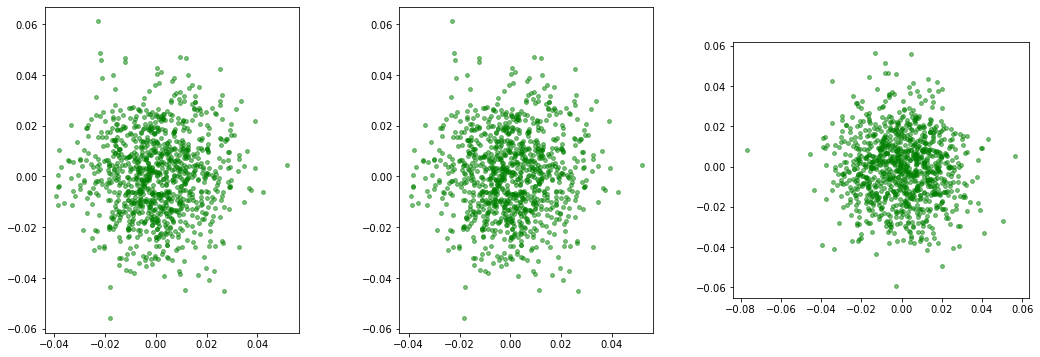

In [21]:
# eigx,eigvecx=la.eig(X)
# inveigvecx = la.inv(eigvecx)
# grand [0.57022867 0.62348524 0.35183067 0.60193072]
nax,nay=1,3
fig,ax=plt.subplots(nax,nay,figsize=(6*nay,6*nax))
# grand [0.46250355 0.24978818 0.29123773 0.59906337]
for j in range(nay):
  for i in range(nax):
      ax[j].scatter(eigvecx[:NE,j],eigvecx[NE:,j],s=15.0,c='green',alpha=0.5)
      ax[j].set_aspect('equal')

In [22]:
print('eigenvalues in eigvecgm')
print(eigvecgm[0,0]/eigvecgm[1,0],eigvecgm[0,1]/eigvecgm[1,1])

eigenvalues in eigvecgm
-5.352863111217462 0.8824731002172483


In [23]:
Nt=np.array([500,500])
NE,NI=Nt[0],Nt[1]
Nparams=np.array([NE,NI])
JE,JI,a,b=1.0,2.5,-0.6,0.6
a,b=0.0,0.0
JEE,JIE,JEI,JII=JE+a,JE-a,JI-b,JI+b
# generate mean Am
Am,Jsv,ua,svam,va=generate_meanmat_eig(Nparams,JEE,JIE,JEI,JII)
eigvoutlier,_=la.eig(Am)
eigvorg = eigvoutlier[:2]

# Xtotal=X.copy()+Am.copy(). 19n32 26 30
# # eigen decomposition
# eigvxt,eigvecxt=la.eig(Xtotal)

In [410]:
gradiusmin=0
for i in range(5):
    grand = gmatamplitude_eig(0.36,2)
    print('before')
    print(grand)
    np.random.shuffle(grand)
    X,Gamp,eigvgmT,eigvecgm,gaverage=generate_localstatsmat_eig(Nparams,grand)
    print(grand)
    eigvgm=eigvgmT.copy()
    # print(eigvgm,gaverage)
    idx = eigvgm.argsort()[::-1]   
    eigvgm = eigvgm[idx]
    gradius=np.sqrt(eigvgm[0])
    if gradius >gradiusmin:
        gradiusmin=gradius.copy()
        grandmin = grand.copy()



before
[0.70239468 0.25094588 0.40455887 0.        ]
[0.70239468 0.25094588 0.40455887 0.        ]
before
[0.67707221 0.26782513 0.15515431 0.40714869]
[0.15515431 0.26782513 0.67707221 0.40714869]
before
[0.81364514 0.24079367 0.         0.        ]
[0.         0.81364514 0.24079367 0.        ]
before
[0.31165834 0.68492169 0.15353125 0.36080399]
[0.36080399 0.31165834 0.68492169 0.15353125]
before
[0.43218567 0.59401867 0.42468502 0.        ]
[0.43218567 0.42468502 0.         0.59401867]


## key points here are
* average g change and how the distribution of outliers change
    
    * with same g_average, change of r_g affects what?

Trace? Determinant? 

In [85]:
## simulation parameters 
'''
# gaverage increase from 0.0 to 1.0 (below the chaotic regime)
# check num_rg batch_rg trials using 
'''
ngavg,batchrg,nrg=6,50,4
gaverageseries = np.linspace(0.1,1.0,ngavg)
print(gaverageseries)

[0.1  0.28 0.46 0.64 0.82 1.  ]


In [88]:
krand,maxout=5,NE
grandseries,gproperties=np.zeros((ngavg,nrg,4)),np.zeros((ngavg,nrg,2))
eigvxtseries=np.zeros((ngavg,nrg,batchrg,maxout),dtype=complex)
# mtildeseries,ntildeseries=np.zeros((ngavg,nrg,batchrg,NE+NI,2),dtype=complex),np.zeros((ngavg,nrg,batchrg,NE+NI,2),dtype=complex)
# Rxseries,Lxseries=np.zeros((ngavg,nrg,batchrg,NE+NI,krand),dtype=complex),np.zeros((ngavg,nrg,batchrg,NE+NI,krand),dtype=complex)
detJseries,traceJseries=np.zeros((ngavg,nrg,batchrg),dtype=complex),np.zeros((ngavg,nrg,batchrg),dtype=complex)
for iga, gaverage in enumerate(gaverageseries):
    for irg in range(nrg):
        for ibatch in range(batchrg):
            if ibatch==0:
                while(1):
                # if i==0:
                    grand = gmatamplitude_eig(gaverage**2,2)
                    idxeff = np.where(grand>0)
                    if (np.shape(idxeff)[1]>2):
                        np.random.shuffle(grand)
                        break
            X,Gamp,eigvgmT,eigvecgm,gaverage=generate_localstatsmat_eig(Nparams,grand)#,ugm,svgm,vgm
            # eigvgm=eigvals(eigvgmT) # for schur decomposition
            eigvgm=eigvgmT.copy()
            idx = eigvgm.argsort()[::-1]   
            eigvgm = eigvgm[idx]
            gradius=np.sqrt(eigvgm[0])
            # mix together
            Xtotal=X.copy()+Am.copy()
            # eigen decomposition
            eigvxt,eigvecxt=la.eig(Xtotal)
            # check the outliers
            ampeigvxt = np.sqrt(np.real(eigvxt)**2+np.imag(eigvxt)**2)
            outliers = eigvxt[np.where(ampeigvxt>gradius)]
            numoutliers = len(outliers)
            ## record
            eigvxtseries[iga,irg,ibatch,:+numoutliers]=outliers[:]           

            # ## calculate m and n decomposition -- mtilde, ntilde
            # utilde,svtilde,vhtilde=la.svd(Xtotal)
            # vtilde=vhtilde.T
            # mtildeseries[i,:,:],ntildeseries[i,:,0],ntildeseries[i,:,1]=utilde[:,:2],svtilde[0]*vtilde[:,0],svtilde[1]*vtilde[:,1]

            ## compare the determinant
            # detJseries[i] = la.det(Xtotal)
            traceJseries[iga,irg,ibatch]=np.sum(outliers[:2])

        grandseries[iga,irg,:]=grand[:]
        gproperties[iga,irg,0],gproperties[iga,irg,1]=gradius,gaverage




In [90]:
## sort by radius g
gradiusset = np.squeeze(gproperties[:,:,0])
eigvxtseries_ord,grandseries_ord = np.zeros_like(eigvxtseries),np.zeros_like(grandseries)
gproperties_ord = np.zeros_like(gproperties)
for igavg in range(ngavg):
    gradiuseach = np.squeeze(gradiusset[igavg,:])
    idxrg=gradiuseach.argsort()[::-1] 
    for i, idxorder in enumerate(idxrg):
        eigvxtseries_ord[igavg,i,:,:]= eigvxtseries[igavg,idxorder,:,:]
        grandseries_ord[igavg,i,:]=grandseries[igavg,idxorder,:]
    gproperties_ord[igavg,:,0],gproperties_ord[igavg,:,1]=gproperties[igavg,idxrg,0],gproperties[igavg,idxrg,1]

## figure for changes along average g and radius?

## mean and variance

In [94]:
xticks = np.arange(-2.0,1.5,1.0)
yticks = np.arange(-1.0,1.0,1.0)
xlims= [-2.1,1.6]
ylims= [-1.1,1.1]

In [104]:
##
nax,nay=ngavg,nrg
fig,ax=plt.subplots(nax,nay,figsize=(3*nax,3*nay))
nsample = nax*nay
idxsample = np.random.random_integers(epochs-1,size=(nax,nay))
eigenvalueschange = np.zeros((nax,nay))
# eigenvalue
for i in range(ngavg):
    for j in range(nrg):
        idx = idxsample[i][j]
        for k in range(batchrg):
            lennum = 2#np.shape(endpoint)[1]
            ax[i][j].scatter(np.real(eigvxtseries_ord[i,j,k,:lennum]),np.imag(eigvxtseries_ord[i,j,k,:lennum]), s=15.0,c='green',alpha=0.5)
            # ax.set_xlabel('radius',fontsize=16)
            # ax.set_ylabel('outlier: real ',fontsize=16)
            # ax.set_xlim([-gaverage,+1*gaverage])
            # ax.set_ylim([eigvorg-gaverage,eigvorg+1*gaverage])
            
            gradius,gaverage = gproperties_ord[i,j,0],gproperties_ord[i,j,1]
            theta = np.linspace(0, 2 * np.pi, 200)
            xr = gradius*np.cos(theta)
            yr = gradius*np.sin(theta)

            xa = gaverage*np.cos(theta)
            ya = gaverage*np.sin(theta)

        # eigenvalue
        ax[i][j].plot(xr, yr, color="darkred", linewidth=1.5,label=r'$r_g=$'+str(format(gradius,'.4f')))
        ax[i][j].plot(xa, ya, color="grey", linewidth=1.5,linestyle='--')#,label=r'fixed $\bar{g}$'+str(format(gaverage,'.4f')))
        ax[i][j].scatter(np.real(eigvorg),np.imag(eigvorg),s=30.0,c='red',alpha=1)
        ax[i][j].set_xlim(xlims)
        ax[i][j].set_ylim(ylims)
        ax[i][j].set_xticks([])
        ax[i][j].set_yticks([])
        ax[i][j].set_aspect('equal')
        ax[i][j].legend()
# 

In [106]:
# ## save data
# eigvxtseries_ord_r2,gproperties_ord_r2,grandseries_ord_r2 = eigvxtseries_ord.copy(),gproperties_ord.copy(),grandseries_ord.copy()
# np.savez('rank2sets.npz', grandseries_ord_r2=grandseries_ord_r2, gproperties_ord_r2=gproperties_ord_r2,eigvxtseries_ord_r2=eigvxtseries_ord_r2) 

In [117]:
stdeigvxtr2=np.zeros((ngavg,nrg,2))
for igavg in range(ngavg):
    for jrg in range(nrg):
        eigvx2data=np.reshape(eigvxtseries_ord_r2[igavg,jrg,:,:2],(batchrg*2,1))
        stdeigvxtr2[igavg,jrg,0]=np.std(np.real(eigvx2data))
        stdeigvxtr2[igavg,jrg,1]=np.std(np.imag(eigvx2data))
print(stdeigvxtr2[:,:,0])
print(stdeigvxtr2[:,:,1])


[[0.15588573 0.14944577 0.14872534 0.15306923]
 [0.16312225 0.15083705 0.17066179 0.17440298]
 [0.17217877 0.19153645 0.16411364 0.14590727]
 [0.28764669 0.2225945  0.20198959 0.20722722]
 [0.39485071 0.31600967 0.34120235 0.26729905]
 [0.53364727 0.51385723 0.63502716 0.24961371]]
[[0.         0.         0.01144    0.        ]
 [0.05282462 0.08940145 0.07085221 0.08092383]
 [0.10436326 0.14660692 0.10294886 0.10510944]
 [0.17266262 0.16720492 0.13712431 0.15381554]
 [0.29581799 0.17368589 0.15745486 0.14866386]
 [0.30512122 0.27682246 0.28558281 0.17746303]]


In [141]:
# yticks = np.arange(-0.05,0.65,.30)
# ylims= [-0.06,0.66]
# fig,ax=plt.subplots(1,ngavg,figsize=(3*ngavg,4))
# for i in range(ngavg):
#     ax[i].plot(gproperties_ord_r2[i,:,0],stdeigvxtr2[i,:,0],'r',linewidth=1.5)
#     ax[i].plot(gproperties_ord_r2[i,:,0],stdeigvxtr2[i,:,1],'b',linewidth=1.5)
#     ax[i].set_ylim(ylims)
#     # ax[i].set_xticks([])
#     ax[i].set_yticks([])


size = ngavg
x = np.arange(size)

total_width, n = 0.8, nrg
width = total_width / n
x = x - (total_width - width) / 2

for j in range(nrg):
    plt.bar(x+width*(j), stdeigvxtr2[:,nrg-j-1,0],  width=width,color='orange',ec='k')
    plt.bar(x+width*(j), stdeigvxtr2[:,nrg-j-1,1], bottom=stdeigvxtr2[:,nrg-j-1,0], width=width,color='darkcyan',ec='k')
plt.legend()
plt.show()
        

No handles with labels found to put in legend.


In [99]:
print(gproperties_ord[0,:,0])
print(gproperties_ord[0,:,1])
print(gproperties_ord[1,:,0])
print(gproperties_ord[1,:,1])
print(gproperties_ord[2,:,0])
print(gproperties_ord[2,:,1])

print(gproperties_ord[3,:,0])
print(gproperties_ord[3,:,1])
print(gproperties_ord[4,:,0])
print(gproperties_ord[4,:,1])
print(gproperties_ord[5,:,0])
print(gproperties_ord[5,:,1])


[0.10236572 0.099503   0.09124897 0.08010862]
[0.1 0.1 0.1 0.1]
[0.38475005 0.34838675 0.29461811 0.27786972]
[0.28 0.28 0.28 0.28]
[0.47871343 0.47764978 0.44209218 0.37880441]
[0.46 0.46 0.46 0.46]
[0.7925504  0.67182644 0.51846812 0.46008373]
[0.64 0.64 0.64 0.64]
[1.04128894 0.83472509 0.81211425 0.68906502]
[0.82 0.82 0.82 0.82]
[1.09879214 1.06683633 1.03067662 0.44342352]
[1. 1. 1. 1.]


In [ ]:
##
nax,nay=2,2
fig,ax=plt.subplots(nax,nay,figsize=(12,12))
nsample = nax*nay
idxsample = np.random.random_integers(epochs-1,size=(nax,nay))
eigenvalueschange = np.zeros((nax,nay))
# eigenvalue
for i in range(0,ngavg,2):
    for j in range(nay):
        idx = idxsample[i][j]
        for k in range(batchrg):
            lennum = 2#np.shape(endpoint)[1]
            ax[i][j].scatter(np.real(eigvxtseries_ord[i,j,k,:lennum]),np.imag(eigvxtseries_ord[i,j,k,:lennum]), s=15.0,c='green',alpha=0.5)

            # ax.set_xlabel('radius',fontsize=16)
            # ax.set_ylabel('outlier: real ',fontsize=16)
            # ax.set_xlim([-gaverage,+1*gaverage])
            # ax.set_ylim([eigvorg-gaverage,eigvorg+1*gaverage])
            ax.set_aspect('equal')

            theta = np.linspace(0, 2 * np.pi, 200)
            xr = gradius*np.cos(theta)
            yr = gradius*np.sin(theta)

            xa = gaverage*np.cos(theta)
            ya = gaverage*np.sin(theta)

            # eigenvalue
            ax[i][j].plot(xr, yr, color="darkred", linewidth=1.5,label=r'$r_g$')
            ax[i][j].plot(xa, ya, color="grey", linewidth=1.5,linestyle='--',label=r'fixed $\bar{g}$')
            ax[i][j].scatter(np.real(eigvorg),np.imag(eigvorg),s=30.0,c='red',alpha=1,label='original outliers')
for i in range(nax):
    for j in range(nay):
        ax[i][j].set_xlim([-0.3,0.3])
        ax[i][j].set_ylim([-0.3,0.3])
        # ax[i].set_xticks(ticks)
        # ax[i].set_yticks(ticks)
        ax[i][j].set_aspect('equal')

In [161]:
X = 10*np.random.randn(10,10)
X = np.reshape(np.arange(64),(8,8))
eigvx,leigvec,reigvec=scpla.eig(X, left=True, right=True)
_,leigvec_=la.eig(X.T)
_,reigvec_=la.eig(X)
print('left')
print(leigvec[:2,:2])
print(leigvec_[:2,:2])
print('right')
print(reigvec[:2,:2])
print(reigvec_[:2,:2])
print()

left
[[-0.31503643+0.j -0.64392619+0.j]
 [-0.32579542+0.j -0.50924801+0.j]]
[[-0.31503643+0.j  0.64392619+0.j]
 [-0.32579542+0.j  0.50924801+0.j]]
right
[[-0.04500809+0.j -0.56339925+0.j]
 [-0.1203162 +0.j -0.40947145+0.j]]
[[-0.04500809+0.j -0.56339925+0.j]
 [-0.1203162 +0.j -0.40947145+0.j]]



In [162]:
plt.imshow(np.real(leigvec_.T@reigvec)**2+np.imag(leigvec_.T@reigvec)**2)

## key point:
* overlap of rank-1

**Rank-1**

* test $\mathbf{n}^{\intercal}\left (\mathbf{X}/\lambda\right )^k\mathbf{m}$

In [3]:
Nt=np.array([1000,1000])
NE,NI=Nt[0],Nt[1]
Nparams=np.array([NE,NI])
JE,JI,a,b=1.0,2.5,-0.6,0.6
a,b=0.0,0.0
JEE,JIE,JEI,JII=JE+a,JE-a,JI-b,JI+b
# JEE,JIE,JEI,JII=JE,JE,JI,JI
# generate mean Am
Am,Jsv,ua,svam,va=generate_meanmat_eig(Nparams,JEE,JIE,JEI,JII)
eigvoutlier,_=la.eig(Am)

In [9]:
# fixed average g
gaverage=0.8
print('pre avg g:',gaverage)
while(1):
    grand = gmatamplitude_eig(gaverage**2,2)
    idxeff = np.where(grand>0)
    if (np.shape(idxeff)[1]>2):
        np.random.shuffle(grand)
        break
## random X matrix
# grand = gaverage*np.ones(4)/np.sqrt(2.0)
# ## homogeneous X matrix

X,Gamp,eigvgmT,eigvecgm,gaverage=generate_localstatsmat_eig(Nparams,grand)#,ugm,svgm,vgm
# eigvgm=eigvals(eigvgmT) # for schur decomposition
eigvgm=eigvgmT.copy()
idx = eigvgm.argsort()[::-1]   
eigvgm = eigvgm[idx]
gradius=np.sqrt(eigvgm[0])
# scpla.eig(X, left=False, right=True)
# mix together
Xtotal=X.copy()+Am.copy()
# eigen decomposition
eigvxt,eigvecxt=la.eig(Xtotal)
# check the outliers
ampeigvxt = np.sqrt(np.real(eigvxt)**2+np.imag(eigvxt)**2)
outliers = eigvxt[np.where(ampeigvxt>gradius)]
numoutliers = len(outliers)
print('post cal avg g:',gaverage)


pre avg g: 0.8
post cal avg g: 0.8


In [10]:
irank=1 # rank-1 
lambdanew=outliers[irank-1]
toleranceerr=1e-5
mvec,nvec=ua[:,:irank].copy(),va[:,:irank].copy()
mvec,nvec=np.reshape(mvec,(NE*2,1)),np.reshape(nvec,(NE*2,1))
for i in np.arange(irank):
    nvec[:,i]*=svam[i]
# nvec,mvec = np.reshape(nvec,(NE*2,1)),np.reshape(mvec,(NE*2,1))
maxordercut = 100
# theta_k=np.zeros(maxordercut,dtype=complex)
lambda_est = 0#np.zeros(1,dtype=complex)
Jdyn=np.eye(NE*2)
for iorder in range(maxordercut):
    print(nvec.T@Jdyn@mvec)
    theta_k=nvec.T@Jdyn@mvec
    lambda_est=lambda_est+theta_k
    Jdyn=Jdyn@X/lambdanew
    # smaller than tolerance
    errort=lambda_est-lambdanew
    errort=np.sqrt(np.real(errort)**2+np.imag(errort)**2)
    if errort<toleranceerr:
      break

[[-1.5]]
[[-0.07221569+0.j]]
[[0.00903411+0.j]]
[[0.03416124+0.j]]
[[0.00706559+0.j]]
[[0.0029462+0.j]]
[[0.00412197+0.j]]
[[-0.00137713+0.j]]
[[-0.00181194+0.j]]
[[0.00017098+0.j]]
[[0.0005288+0.j]]
[[-0.00017185+0.j]]
[[2.39182918e-05+0.j]]


**Rank-2**

* test $\mathbf{n}^{\intercal}\mathbf{Q}_{\lambda}\mathbf{m}$

In [186]:
Nt=np.array([1000,1000])
NE,NI=Nt[0],Nt[1]
Nparams=np.array([NE,NI])
JE,JI,a,b=1.0,2.5,-0.6,0.6
# a,b=0.0,0.0
JEE,JIE,JEI,JII=JE+a,JE-a,JI-b,JI+b
# JEE,JIE,JEI,JII=JE,JE,JI,JI
# generate mean Am
Am,Jsv,ua,svam,va=generate_meanmat(Nparams,JEE,JIE,JEI,JII)
eigvoutlier,_=la.eig(Am)

post 0.9


In [164]:
# fixed average g
gaverage=0.9
print('pre avg g:',gaverage)
while(1):
    grand = gmatamplitude(gaverage,2)
    idxeff = np.where(grand>0)
    if (np.shape(idxeff)[1]>2):
        np.random.shuffle(grand)
        break
## random X matrix
# grand = gaverage*np.ones(4)/np.sqrt(2.0)
# ## homogeneous X matrix

X,Gamp,eigvgmT,eigvecgm,gaverage=generate_localstatsmat(Nparams,grand)#,ugm,svgm,vgm
# eigvgm=eigvals(eigvgmT) # for schur decomposition
eigvgm=eigvgmT.copy()
idx = eigvgm.argsort()[::-1]   
eigvgm = eigvgm[idx]
gradius=np.sqrt(eigvgm[0])
# scpla.eig(X, left=False, right=True)
# mix together
Xtotal=X.copy()+Am.copy()
# eigen decomposition
eigvxt,eigvecxt=la.eig(Xtotal)
# check the outliers
ampeigvxt = np.sqrt(np.real(eigvxt)**2+np.imag(eigvxt)**2)
outliers = eigvxt[np.where(ampeigvxt>gradius)]
numoutliers = len(outliers)
print('post cal avg g:',gaverage)


[-1.52868284+0.j -1.04421043+0.j]
[-1.5+0.j -1.2+0.j]


In [74]:
# lambda
lambdanewseries=np.zeros(2)
eigvnewseries=np.zeros((2,2),dtype=complex)
irank=2
toleranceerr=1e-3
lambdanewseries=outliers[:irank].copy()
mvec,nvec=ua[:,:irank].copy(),va[:,:irank].copy()
for i in np.arange(irank):
    nvec[:,i]*=svam[i]
# nvec,mvec = np.reshape(nvec,(NE*2,1)),np.reshape(mvec,(NE*2,1))
cutorder = np.zeros(2)
maxordercut = 100
theta_k=np.zeros((irank,irank),dtype=complex)
for jl in range(2):
    # Mlambda=np.zeros((NE*2,NE*2))
    Jdyn=np.eye(NE*2,dtype=complex)
    Mlambda=Jdyn.copy()
    for jcut in range(maxordercut):
        Jdyn=Jdyn@X
        Mlambda+=Jdyn/(lambdanewseries[jl]**(1+jcut))
        theta_k=nvec.T@Mlambda@mvec
        eigvnew,eigvecnew=la.eig(theta_k)
        lambda_est=eigvnew.copy()
        # in this case theta_k[0,1], theta_k[1,0]
        errort=lambda_est-lambdanewseries[jl]
        errort=np.min(np.sqrt(np.real(errort)**2+np.imag(errort)**2))
        if errort<toleranceerr:
            cutorder[jl]=jcut
            eigvnewseries[jl,:],eigvecnew=la.eig(theta_k)
            break
print(cutorder)
print(eigvnewseries)
print(outliers[:irank])

[[-2.42282545]]


## testing the eigenvectors of J and P
* rank-1, the eigenvalue and eigenvectors in rank-1 structure.
* rank-2, check the mean of eigenvalues (lambda_1 and lambda_2)
* rank-1 which one is the better expression

In [56]:
Nt=np.array([1000,1000])
NE,NI=Nt[0],Nt[1]
Nparams=np.array([NE,NI])
JE,JI,a,b=1.0,3.5,-0.6,0.6
a,b=0.0,0.0
JEE,JIE,JEI,JII=JE+a,JE-a,JI-b,JI+b
# JEE,JIE,JEI,JII=JE,JE,JI,JI
# generate mean Am
Am,Jsv,ua,svam,va=generate_meanmat_eig(Nparams,JEE,JIE,JEI,JII)
eigvoutlier,_=la.eig(Am)

* first test homogeneous random matrix
* second test extreme, heterogeneous random matrix

In [57]:
# first use the homogeneous g
gaverageseries=np.linspace(0.1,1.0,10)
print('avg g series:',gaverageseries)
# while(1):
#     grand = gmatamplitude_eig(gaverage**2,2)
#     idxeff = np.where(grand>0)
#     if (np.shape(idxeff)[1]>2):
#         np.random.shuffle(grand)
#         break
# random X matrix



avg g series: [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [58]:
ngavg = len(gaverageseries)
nbatch = 10
eigvecxt_series,sglmxt_series,sglnxt_series = np.zeros((NE*2,nbatch,ngavg)),np.zeros((NE*2,nbatch,ngavg)),np.zeros((NE*2,nbatch,ngavg))
eigvoutlier_series=np.zeros((ngavg,nbatch))
simradius_series=np.zeros((ngavg,nbatch))
for iavg, gaverage in enumerate(gaverageseries):
    grand = gaverage*np.ones(4)/np.sqrt(2.0)
    for ibatch in range(nbatch):
        ## homogeneous X matrix
        X,Gamp,eigvgmT,eigvecgm,gaverage=generate_localstatsmat_eig(Nparams,grand)#,ugm,svgm,vgm
        # eigvgm=eigvals(eigvgmT) # for schur decomposition
        eigvgm=eigvgmT.copy()
        idx = eigvgm.argsort()[::-1]   
        eigvgm = eigvgm[idx]
        gradius=np.sqrt(eigvgm[0])
        # scpla.eig(X, left=False, right=True)
        # mix together
        Xtotal=X.copy()+Am.copy()
        # eigen decomposition
        eigvxt,eigvecxt=la.eig(Xtotal)
        # SVD decomposition
        uxt,svxt,vhxt=la.svd(Xtotal)
        vxt=vhxt.T
        mxt= uxt[:,0].copy()
        nxt=vxt[:,0].copy()*svxt[0]
        # check the outliers
        ampeigvxts= np.sqrt(np.real(eigvxt)**2+np.imag(eigvxt)**2)
        ampeigvxtbulk= np.sqrt(np.real(eigvxt[1])**2+np.imag(eigvxt[1])**2)
        outliers = eigvxt[np.where(ampeigvxt>ampeigvxtbulk)]

        # preserve the data
        eigvecxt_series[:,ibatch,iavg]=eigvecxt[:,0]
        sglmxt_series[:,ibatch,iavg]=mxt[:]
        sglnxt_series[:,ibatch,iavg]=nxt[:]
        eigvoutlier_series[iavg,ibatch]=outliers[0]
        simradius_series[iavg,ibatch]=ampeigvxtbulk
        # print('post cal avg g:',gaverage)


In [59]:
## calculate the mean and variances of new outliers
avg_outliersnew,std_outliersnew=np.zeros(ngavg),np.zeros(ngavg)
avg_overlap_eigvec_m,std_overlap_eigvec_m=np.zeros(ngavg),np.zeros(ngavg)
for i in range(ngavg):
    avg_outliersnew[i]=np.mean(eigvoutlier_series[i,:])
    std_outliersnew[i]=np.std(eigvoutlier_series[i,:])
    eigvec_current=np.squeeze(eigvecxt_series[:,:,i])
    overlap_eigvec_m = np.abs(np.reshape(ua[:,0],(1,NE*2))@eigvec_current)
    avg_overlap_eigvec_m[i]=np.mean(overlap_eigvec_m)
    std_overlap_eigvec_m[i]=np.std(overlap_eigvec_m)

In [60]:
# fig,ax=plt.subplots(figsize=(9,9))
ax.plot(gaverageseries,avg_overlap_eigvec_m,'b.')
ax.set_aspect('equal')

## noise distribution (clouds' statistics)

In [34]:
print('eigenvector:')
print(eigvecxt_series[1::500,1,1])
print('left singular vector:')
print(sglmxt_series[1::500,1,1])
print('grand:')
print(grand)
print('r_g')
print(gradius)
eigvecoutlier = eigvecxt[:,0].copy()
overlap_eigvec_m = np.sum(eigvecoutlier*ua)
print('overlap between eigenvectors:')
print(overlap_eigvec_m)
print('new outliers')
print(outliers[0])

grand:
[0.6363961 0.6363961 0.6363961 0.6363961]
r_g
0.9
overlap between eigenvectors:
(-0.7207829438756697+0j)
new outliers
(-1.523590688003861+0j)


## Plot the distribution of the entries in

In [35]:
# red dot the original eigenvectors
# blue scatter the new eigenvectors
fig,ax=plt.subplots(figsize=(9,9))
ax.scatter(eigvecoutlier[:NE],eigvecoutlier[NE:])
ax.set_aspect('equal')

## plot fixed grand

In [63]:
# print(np.max(-radiusgseries))
print(gproperties[:,0])
# fig,ax=plt.subplots(figsize=(8,6))
for i in range(epochs):
  endpoint = np.where(np.real(eigvxtseries[i,:])**2+np.imag(eigvxtseries[i,:])**2>0)
  lennum = 2#np.shape(endpoint)[1]
  ax.scatter(np.real(eigvxtseries[i,:lennum]),np.imag(eigvxtseries[i,:lennum]), s=15.0,c='green',alpha=0.5)

ax.set_xlabel('radius',fontsize=16)
ax.set_ylabel('outlier: real ',fontsize=16)
# ax.set_xlim([-gaverage,+1*gaverage])
# ax.set_ylim([eigvorg-gaverage,eigvorg+1*gaverage])
ax.set_aspect('equal')

theta = np.linspace(0, 2 * np.pi, 200)
xc = np.sqrt(2)*gaverage*np.cos(theta)
yc = np.sqrt(2)*gaverage*np.sin(theta)

xr = np.sqrt(2)*gradius*np.cos(theta)
yr = np.sqrt(2)*gradius*np.sin(theta)

xa = gaverage*np.cos(theta)
ya = gaverage*np.sin(theta)

# eigenvalue
ax.plot(xc, yc, color="darkred", linewidth=1.5,label=r'max $r_g$')
ax.plot(xr, yr, color="green", linewidth=1.5,label=r'$r_g$')
ax.plot(xa, ya, color="grey", linewidth=1.5,linestyle='--',label=r'fixed $\bar{g}$')
ax.scatter(np.real(eigvorg),np.imag(eigvorg),s=30.0,c='red',alpha=1,label='original outliers')
ax.set_xlabel('real',fontsize=16)
ax.set_ylabel('imaginary',fontsize=16)
ax.legend()

[0.19405327 0.19405327 0.19405327 0.19405327 0.19405327 0.19405327
 0.19405327 0.19405327 0.19405327 0.19405327 0.19405327 0.19405327
 0.19405327 0.19405327 0.19405327 0.19405327 0.19405327 0.19405327
 0.19405327 0.19405327 0.19405327 0.19405327 0.19405327 0.19405327
 0.19405327 0.19405327 0.19405327 0.19405327 0.19405327 0.19405327
 0.19405327 0.19405327 0.19405327 0.19405327 0.19405327 0.19405327
 0.19405327 0.19405327 0.19405327 0.19405327 0.19405327 0.19405327
 0.19405327 0.19405327 0.19405327 0.19405327 0.19405327 0.19405327
 0.19405327 0.19405327 0.19405327 0.19405327 0.19405327 0.19405327
 0.19405327 0.19405327 0.19405327 0.19405327 0.19405327 0.19405327
 0.19405327 0.19405327 0.19405327 0.19405327 0.19405327 0.19405327
 0.19405327 0.19405327 0.19405327 0.19405327 0.19405327 0.19405327
 0.19405327 0.19405327 0.19405327 0.19405327 0.19405327 0.19405327
 0.19405327 0.19405327 0.19405327 0.19405327 0.19405327 0.19405327
 0.19405327 0.19405327 0.19405327 0.19405327 0.19405327 0.1940

In [30]:
## CHECK THE TRACE OF DETERMINISTIC CONNECTIVITY IS EQUIVALENT TO J
tracedeterm=JE-JI+a-b
traceoverall=np.sum(eigvxt[:2])
print('trace equivalent')
print(tracedeterm,traceoverall)
print('grand fixed')
print(grand)
print('outliers after')
print(outliers[:2])
print('original outliers')
print(eigvorg)

trace equivalent
-2.7 (-2.5504584145999853+0j)
grand fixed
[0.69473237 0.         0.41306562 0.25830937]
outliers after
[-1.61261702+0.j -0.9378414 +0.j]
original outliers
[-1.5+0.j -1.2+0.j]


In [38]:
maxradiusg,minradiusg=np.max(gproperties[:,0]),np.max(-gproperties[:,0])
minradiusg*=(-1)
radiusgseries = (gproperties[:,0]-minradiusg)/(maxradiusg-minradiusg)*1.0
colorseries=[str(item) for item in radiusgseries]
print(radiusgseries)
# print(np.max(-radiusgseries))
fig,ax=plt.subplots(figsize=(8,6))
for i in range(epochs):
  endpoint = np.where(np.real(eigvxtseries[i,:])**2+np.imag(eigvxtseries[i,:])**2>0)
  lennum = 2#np.shape(endpoint)[1]
  ax.scatter(np.real(eigvxtseries[i,:lennum]),np.imag(eigvxtseries[i,:lennum]), s=15.0,c=colorseries[i],alpha=0.5)

ax.set_xlabel('radius',fontsize=16)
ax.set_ylabel('outlier: real ',fontsize=16)
# ax.set_xlim([-gaverage,+1*gaverage])
# ax.set_ylim([eigvorg-gaverage,eigvorg+1*gaverage])
ax.set_aspect('equal')

theta = np.linspace(0, 2 * np.pi, 200)
xc = np.sqrt(2)*gaverage*np.cos(theta)
yc = np.sqrt(2)*gaverage*np.sin(theta)

xa = gaverage*np.cos(theta)
ya = gaverage*np.sin(theta)

# eigenvalue
ax.plot(xc, yc, color="darkred", linewidth=1.5,label=r'max $r_g$')
ax.plot(xa, ya, color="grey", linewidth=1.5,linestyle='--',label=r'fixed $\bar{g}$')
ax.scatter(np.real(eigvorg),np.imag(eigvorg),s=30.0,c='red',alpha=1,label='original outliers')
ax.set_xlabel('real',fontsize=16)
ax.set_ylabel('imaginary',fontsize=16)
ax.legend()

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan]


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not nan

## testing the overlap matrix 

In [487]:
##
overlapseries = np.zeros((epochs,2,2),dtype=complex)

# traceJseries,detJseries=np.zeros(epochs,dtype=complex),np.zeros(epochs,dtype=complex)
# eigenvalue
for i in range(epochs):
    overlapseries[i,:,:]=np.squeeze(ntildeseries[i,:,:]).T@np.squeeze(mtildeseries[i,:,:])
traceOVseries, detOVseries = np.zeros(epochs),np.zeros(epochs)
for i in range(epochs):
    traceOVseries[i]=overlapseries[i,0,0]+overlapseries[i,1,1]
    detOVseries[i] = (overlapseries[i,0,0]*overlapseries[i,1,1]-overlapseries[i,0,1]*overlapseries[i,1,0])

    # traceJseries[i]=np.sum(eigvxtseries[i,:2])
    # detJseries[i] = la.det(np.squeeze(mtildeseries[i,:,:])@np.squeeze(ntildeseries[i,:,:]).T)
fig,ax=plt.subplots(figsize=(8,6))
# ax.scatter(detseries,traceseries, s=15.0,c='r',alpha=0.5)
## determinant change with r_g
rg_series = np.squeeze(gproperties[:,0])
## tendency?
ax.scatter(rg_series,detOVseries, s=5.0,c='r',alpha=0.5)
ax.scatter(rg_series,detJseries, s=5.0,c='orange',alpha=0.5)
ax.scatter(rg_series,-traceJseries**2/4, s=5.0,c='green',alpha=0.5)
ax.scatter(rg_series,traceOVseries, s=5.0,c='b',alpha=0.5)
# imag or real Tr^2/4 = Det
imagrealsep = np.sum(eigvorg)#np.sum(eigvorg)**2/4.0
detmin,detmax = np.max(-detseries),np.max(detseries)
detmin *=(-1)
xx = np.linspace(detmin*1.25,detmax*1.25,50)
yy = imagrealsep*np.ones(50)
ax.plot(xx,yy,'r--',linewidth=1.5)






In [ ]:
##
overlapseries = np.zeros((epochs,2,2),dtype=complex)
# eigenvalue
for i in range(epochs):
    overlapseries[i,:,:]=np.squeeze(ntildeseries[i,:,:]).T@np.squeeze(mtildeseries[i,:,:])
traceseries, detseries = np.zeros(epochs),np.zeros(epochs)
for i in range(epochs):
    traceseries[i]=overlapseries[i,0,0]+overlapseries[i,1,1]
    detseries[i] = (overlapseries[i,0,0]*overlapseries[i,1,1]-overlapseries[i,0,1]*overlapseries[i,1,0])
fig,ax=plt.subplots(figsize=(8,6))
# ax.scatter(detseries,traceseries, s=15.0,c='r',alpha=0.5)
## determinant change with r_g
rg_series = np.squeeze(gproperties[:,0])
## tendency?
ax.scatter(rg_series,detseries, s=5.0,c='r',alpha=0.5)
ax.scatter(rg_series,traceseries, s=5.0,c='b',alpha=0.5)
# imag or real Tr^2/4 = Det
imagrealsep = np.sum(eigvorg)**2/4.0
detmin,detmax = np.max(-detseries),np.max(detseries)
detmin *=(-1)
xx = np.linspace(detmin*1.25,detmax*1.25,50)
yy = imagrealsep*np.ones(50)
ax.plot(xx,yy,'r--',linewidth=1.5)

In [453]:
##
nax,nay=2,2
fig,ax=plt.subplots(nax,nay,figsize=(12,12))
nsample = nax*nay
idxsample = np.random.random_integers(epochs-1,size=(nax,nay))
eigenvalueschange = np.zeros((nax,nay))
# eigenvalue
for i in range(nax):
    for j in range(nay):
        idx = idxsample[i][j]
        ax[i][j].scatter(mtildeseries[idx,:NE,:],ntildeseries[idx,:NE,:],s=15.0,c='red',alpha=0.5)
        ax[i][j].scatter(mtildeseries[idx,NE:],ntildeseries[idx,NE:],s=15.0,c='blue',alpha=0.5)
        eigenvalueschange[i,j] = np.sum(mtildeseries[idx,:]*ntildeseries[idx,:])
        ax[i][j].set_title(r'$\tilde{m}^{\intercal}\tilde{n}=$'+str(format(eigenvalueschange[i,j],'.2f')))
# ax[0].scatter(mtildeseries[idx0,:NE],ntildeseries[idx0,:NE],s=15.0,c='red',alpha=0.5)
# ax[0].scatter(mtildeseries[idx0,NE:],ntildeseries[idx0,NE:],s=15.0,c='blue',alpha=0.5)
# ax[1].scatter(mtildeseries[idx1,:NE],ntildeseries[idx1,:NE],s=15.0,c='red',alpha=0.5)
# ax[1].scatter(mtildeseries[idx1,NE:],ntildeseries[idx1,NE:],s=15.0,c='blue',alpha=0.5)
for i in range(nax):
    for j in range(nay):
        ax[i][j].set_xlim([-0.3,0.3])
        ax[i][j].set_ylim([-0.3,0.3])
        # ax[i].set_xticks(ticks)
        # ax[i].set_yticks(ticks)
        ax[i][j].set_aspect('equal')

Text(0.5, 1.0, '$\\bar{g},\\max{r_g}=$0.60,0.85')

# back up code

In [ ]:
# Block Gaussian Random Network
xee,xei,xie,xii=0.6,0.25,0.25,0.3#1.2,1.2,1.8
JE,JI=5.0*xee,4.0*xii

# generate random 
Grand=np.array([xee,xei,xie,xii])
X,Gamp,eigvgmT,eigvecgm,gaverage,ugm,svgm,vgm=generate_localstatsmat(Nparams,Grand)
eigvgm=eigvals(eigvgmT)
idx = eigvgm.argsort()[::-1]   
eigvgm = eigvgm[idx]
gradius=np.sqrt(eigvgm[0])
# generate mean Am
Am,Jsv,ua,svam,va=generate_meanmat(Nparams,JE,JI)
# # CALCULATE XTOTAL
# Xtotal=X.copy()+Am.copy()
# # Combine, total svd decomposition
# uxt,svxt,vhxt=la.svd(Xtotal)
# vxt=vhxt.T   
# eigvx,eigvecx=la.eig(Xtotal)

In [1218]:
# calculate mean for real
mu_utilde = np.zeros((2,1))
mu_utilde[0,0],mu_utilde[1,0]=np.mean(uxt[:NE,0]),np.mean(uxt[NE:,0])
noise_utilde = np.zeros((2,1))
noise_utilde[0,0],noise_utilde[1,0]=np.std(uxt[:NE,0]),np.std(uxt[NE:,0])

# vector to calculate uE-real
angle_1= np.arctan2(xee/JE/np.sqrt(NE),-np.sqrt(1-(xee/JE)**2)/np.sqrt(NE))
angle_2 = np.arctan2(xei/JI/np.sqrt(NE),-np.sqrt(1-(xei/JI)**2)/np.sqrt(NE))
vec_1=np.array([[np.cos(angle_1),np.sin(angle_1)]]).T
vec_1/=np.sqrt(NE)
print('vec1',vec_1,vec_1[0]/vec_1[1])
print('numvec1:',iid_mu_u['E'][0,0],np.std(uxtEE[:,0]),iid_mu_u['E'][0,0]/np.std(uxtEE[:,0]))
vec_2=np.array([[np.cos(angle_2),np.sin(angle_2)]]).T
vec_2/=np.sqrt(NE)
# print('vec2',vec_2,vec_2[0]/vec_2[1])
# print('numvec2:',iid_mu_u['E'][1,0],np.std(uxtEI[:,0]),iid_mu_u['E'][1,0]/np.std(uxtEI[:,0]))
# print('angles')
# print(angle_1,angle_2)
rot_theta = (angle_1-angle_2)/2.0
Rot1=np.array([[np.cos(rot_theta),-np.sin(rot_theta)],[np.sin(rot_theta),np.cos(rot_theta)]])
Rot2=np.array([[np.cos(-rot_theta),-np.sin(-rot_theta)],[np.sin(-rot_theta),np.cos(-rot_theta)]])
# the first is gonna be drew back 
# the second is gonna be pushed forward

theo_mu=np.zeros((2,2))
theo_mu[0,:]= np.squeeze(Rot2@vec_1)*xee/JE
test_ang2= Rot1@vec_2*xei/JI
# print('rotate')
# print(theo_mu[0,:],test_ang2)
# print(np.sqrt(theo_mu[0,1]**2+test_ang2[1]**2))
print('real mean:')
print(mu_utilde[0,0],noise_utilde[0,0])
# print(mu_utilde[0,0],iid_mu_u['E'][0,0]/np.sqrt(xee/JE),iid_mu_u['E'][1,0]/np.sqrt(xei/JI))#,noise_utilde[0,0])
# print('noise comp:',noise_utilde[0,0]/vec_1[1])

# vector to calculate uE-real
angle_1= np.arctan2(xie/JE/np.sqrt(NE),np.sqrt(1-(xie/JE)**2)/np.sqrt(NE))
angle_2 = np.arctan2(xii/JI/np.sqrt(NE),-np.sqrt(1-(xii/JI)**2)/np.sqrt(NE))
vec_1=np.array([[np.cos(angle_1),np.sin(angle_1)]]).T
vec_1/=np.sqrt(NE)
# print('vec1',vec_1,vec_1[0]/vec_1[1])
# print('numvec1:',iid_mu_u['I'][0,0],np.std(uxtIE[:,0]),iid_mu_u['I'][0,0]/np.std(uxtIE[:,0]))
vec_2=np.array([[np.cos(angle_2),np.sin(angle_2)]]).T
vec_2/=np.sqrt(NE)
print('vec2',vec_2,vec_2[0]/vec_2[1])
print('numvec2:',iid_mu_u['I'][1,0],np.std(uxtII[:,0]),iid_mu_u['I'][1,0]/np.std(uxtII[:,0]))
# print('angles')
# print(angle_1,angle_2)
rot_theta = (angle_1-angle_2)/2.0
Rot1=np.array([[np.cos(rot_theta),-np.sin(rot_theta)],[np.sin(rot_theta),np.cos(rot_theta)]])
Rot2=np.array([[np.cos(-rot_theta),-np.sin(-rot_theta)],[np.sin(-rot_theta),np.cos(-rot_theta)]])
# the first is gonna be drew back 
# the second is gonna be pushed forward

theo_mu=np.zeros((2,2))
theo_mu[0,:]= np.squeeze(Rot2@vec_1)*xee/JE
test_ang2= Rot1@vec_2*xei/JI
# print('rotate')
# print(theo_mu[0,:],test_ang2)
# print(np.sqrt(theo_mu[0,1]**2+test_ang2[1]**2))
print('real mean:')
print(mu_utilde[1,0],noise_utilde[1,0])
# print('noise comp:',noise_utilde[1,0]/vec_2[1])




vec1 [[-0.01897367]
 [ 0.02529822]] [-0.75]
numvec1: -0.01947075138589678 0.024917661215864535 -0.7814036484892962
real mean:
0.02055340669452231 0.009104648046617814
vec2 [[-0.01897367]
 [ 0.02529822]] [-0.75]
numvec2: 0.0172223163447693 0.02652153501818273 0.6493710236968548
real mean:
0.020406871667918793 0.008844345420995098


In [ ]:
# print(iid_sv)

overlaptt,overlaptheo,overlaptheo2=np.zeros((2,2)),np.zeros((2,2)),np.zeros((2,2))
overlaptt[0,0]=np.sum(uxt[:NE,0]*vxt[:NE,0]*svxt[0])
print(np.mean(uxt[:NE,0]),np.mean(vxt[:NE,0]),svxt[0])
overlaptt[0,1]=np.sum(uxt[:NE,0]*vxt[NE:,0]*svxt[0])
print(np.mean(uxt[:NE,0]),np.mean(vxt[NE:,0]),svxt[0])
overlaptt[1,0]=np.sum(uxt[NE:,0]*vxt[:NE,0]*svxt[0])
overlaptt[1,1]=np.sum(uxt[NE:,0]*vxt[NE:,0]*svxt[0])

overlaptheo[0,0]=np.sum(uxtEE[:,0]*vxtEE[:,0]*svxtEE[0])#iid_sv[0,0]*(1-xee**2/JE**2)
print(np.mean(uxtEE[:,0]),np.mean(vxtEE[:,0]),svxtEE[0])
overlaptheo[0,1]=np.sum(uxtEI[:,0]*vxtEI[:,0]*svxtEI[0])#iid_sv[0,1]*(1-xei**2/JI**2)
print(np.mean(uxtEI[:,0]),np.mean(vxtEI[:,0]),svxtEI[0])
overlaptheo[1,0]=np.sum(uxtIE[:,0]*vxtIE[:,0]*svxtIE[0])#iid_sv[1,0]*(1-xie**2/JE**2)
overlaptheo[1,1]=np.sum(uxtII[:,0]*vxtII[:,0]*svxtII[0])#iid_sv[1,1]*(1-xii**2/JI**2)

overlaptheo2[0,0]=np.sum(iid_sv[0,0]*(1-xee**2/JE**2))
overlaptheo2[0,1]=-np.sum(iid_sv[0,1]*(1-xei**2/JI**2))
overlaptheo2[1,0]=np.sum(iid_sv[1,0]*(1-xie**2/JE**2))
overlaptheo2[1,1]=-np.sum(iid_sv[1,1]*(1-xii**2/JI**2))

print('tilde overlap:')
print(overlaptt)
print('theo overlap:')
print(overlaptheo)
print('theo overlap2:')
print(overlaptheo2)
print('change:')
overlapchange=overlaptheo2-overlaptt
print(overlapchange)
# eigvtt,eigvectt=la.eig(overlaptt)
# eigvtheo,eigvectheo=la.eig(overlaptheo)
# print('eigenvalue compare:')
# print(eigvtt)
# print(eigvtheo)

In [879]:
Xtotal=X.copy()+Am.copy()
# singular decomposition
uxt,svxt,vhxt=la.svd(Xtotal)
vxt=vhxt.T
ux,svx,vhx=la.svd(X)
vx=vhx.T
print(svxt[:5])
print(svx[:5])


## dissect noise and mean components
## mean for total and original
muxtt,mvxtt=np.zeros((2,1)),np.zeros((2,1))
muxtt[0,0],muxtt[1,0]=np.mean(uxt[:NE,0]),np.mean(uxt[NE:,0])
mvxtt[0,0],mvxtt[1,0]=np.mean(vxt[:NE,0]),np.mean(vxt[NE:,0])
mua,mva = np.zeros((2,1)),np.zeros((2,1))
mua[0,0],mua[1,0]=ua[0,0],ua[NE+1,0]
mva[0,0],mva[1,0]=va[0,0],va[NE+1,0]
# noise components E and I seperate 
noiseu,noisev=np.zeros((NE,2)),np.zeros((NE,2))
# for E noise
noiseu[:,0]=(uxt[:NE,0]-muxtt[0,0])
noisev[:,0]=(vxt[:NE,0]-mvxtt[0,0])
# for I noise
noiseu[:,1]=(uxt[NE:,0]-muxtt[1,0])
noisev[:,1]=(vxt[NE:,0]-mvxtt[1,0])
noisem,noisen=noiseu.copy(),noisev.copy()#*svxt[0]

# noise components 4*4
noisevec = np.zeros((NE,4))
noisevec[:,:2]=noisem.copy()
noisevec[:,2:]=noisen.copy()


[6.44943161 4.00928745 3.98429257 3.96936678 3.94801228]
[4.00973264 3.98515474 3.97197553 3.94868445 3.92199661]


In [800]:
mleft=5.0*np.random.randn(NE,1)/np.sqrt(NE)
nright=4.0*np.random.randn(NE,1)/np.sqrt(NE)
Cnright = 3*np.ones((NE,1))
Cmleft = 1*np.ones((NE,1))
randomm=mleft@Cnright.T+Cmleft@nright.T 
lrand=np.reshape(randomm,(NE**2,1))
theostd = (5*3)**2/NE+(4*1)**2/NE
theostd = np.sqrt(theostd)
print('stdnum:',np.std(lrand),theostd)

stdnum: 0.4973373839263357 0.4909175083453431


In [ ]:
# # subject to
# sigmE,signI,sigmI,signE=2.0,3.0,1.0,4.0
# rhoE=xee/sigmE/signE*1.5
# rhoI=xii/sigmI/signI*1.5
# m,n=np.zeros((N,1)),np.zeros((N,1))
# zetaxE,zetayE,zetaxI,zetayI=np.random.randn(NE),np.random.randn(NE),np.random.randn(NI),np.random.randn(NI)
# m[:NE,0]=sigmE*zetaxE/np.sqrt(N)
# n[:NE,0]=signE*(rhoE*zetaxE+np.sqrt(1-rhoE**2)*zetayE)/np.sqrt(N)
# m[NE:,0]=sigmI*zetaxI/np.sqrt(N)
# n[NE:,0]=signI*(rhoI*zetaxI+np.sqrt(1-rhoI**2)*zetayI)/np.sqrt(N)
# P=m@n.T 
# Xtilde=X.copy()+P.copy()

In [284]:
stdme=np.std(lxvec[:NE,0])
stdmi=np.std(lxvec[NE:,0])
stdne=np.std(svx[0]*rxvec[:NE,0])
stdni=np.std(svx[0]*rxvec[NE:,0])
rm1=np.array([stdme,stdmi])
rm1=np.reshape(rm1,(2,1))
rn1=np.array([stdne,stdni])
rn1=np.reshape(rn1,(2,1))
stdme=np.std(lxvec[:NE,1])
stdmi=np.std(lxvec[NE:,1])
stdne=np.std(svx[1]*rxvec[:NE,1])
stdni=np.std(svx[1]*rxvec[NE:,1])
rm2=np.array([stdme,stdmi])
rm2=np.reshape(rm2,(2,1))
rn2=np.array([stdne,stdni])
rn2=np.reshape(rn2,(2,1))
gstdest=rm1@rn1.T +rm2@rn2.T 
print('cal g:',gstdest)
print('org g:',xee**2/N,xei**2/N,xie**2/N,xii**2/N)

cal g: [[0.00089115 0.00017327]
 [0.00276879 0.00053832]]
org g: 0.000625 0.0009 0.0025 0.000225


In [269]:
lxvec,svx,rxvech=la.svd(P)
rxvec=rxvech.T 
fig,ax=plt.subplots(2,2,figsize=(9,9))
nbins=30
n, bins, patches = ax[0][0].hist(lxvec[:NE,0], nbins, density=True, alpha=0.5)
n, bins, patches = ax[1][0].hist(lxvec[NE:,0], nbins, density=True, alpha=0.5)
n, bins, patches = ax[0][1].hist(rxvec[:NE,0], nbins, density=True, alpha=0.5)
n, bins, patches = ax[1][1].hist(rxvec[NE:,0], nbins, density=True, alpha=0.5)
